#Data Prep

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd

# Define the path to the datas directory in your Google Drive
data_dir = '/content/drive/MyDrive/ECG/datas/'

# Load the original CSV files
original_normal_data_path = f'{data_dir}ptbdb_normal.csv'
original_abnormal_data_path = f'{data_dir}ptbdb_abnormal.csv'

original_normal_data = pd.read_csv(original_normal_data_path, header=None)
original_abnormal_data = pd.read_csv(original_abnormal_data_path, header=None)

# Load the converted CSV files
converted_normal_data_path = f'{data_dir}normal_samples_converted.csv'
converted_abnormal_data_path = f'{data_dir}abnormal_samples_converted.csv'

converted_normal_data = pd.read_csv(converted_normal_data_path, header=None)
converted_abnormal_data = pd.read_csv(converted_abnormal_data_path, header=None)

# Display the first few rows of the original and converted data
print("Original Normal Data (first 5 rows):\n", original_normal_data.head())
print("Converted Normal Data (first 5 rows):\n", converted_normal_data.head())
print("Original Abnormal Data (first 5 rows):\n", original_abnormal_data.head())
print("Converted Abnormal Data (first 5 rows):\n", converted_abnormal_data.head())


Original Normal Data (first 5 rows):
         0         1         2         3         4         5         6    \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

        7         8         9    ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  187  
0  0.0  0.0  
1 

#Normalize data adn plot ECG samples

Features (first 5 rows):
 [[0.93223286 0.86967856 0.88618594 0.92962641 0.90877497 0.93397045
  0.80104256 0.7497828  0.6872285  0.63509989 0.64986968 0.63509989
  0.65508252 0.66463947 0.63336229 0.74630755 0.87141615 0.9383145
  1.         0.94874024 0.39617723 0.         0.03909644 0.12858383
  0.30582103 0.64031279 0.6177237  0.53779322 0.35273674 0.22067767
  0.25629887 0.35794961 0.48218939 0.57080799 0.57775849 0.62033015
  0.62206775 0.6185925  0.6264118  0.61251086 0.62206775 0.59774107
  0.6185925  0.63075584 0.62293661 0.62814945 0.60642922 0.64465684
  0.67158991 0.62293661 0.67332757 0.66985232 0.6872285  0.72458732
  0.71850562 0.7506516  0.72806257 0.73935705 0.74804521 0.7437011
  0.78887922 0.73935705 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.        

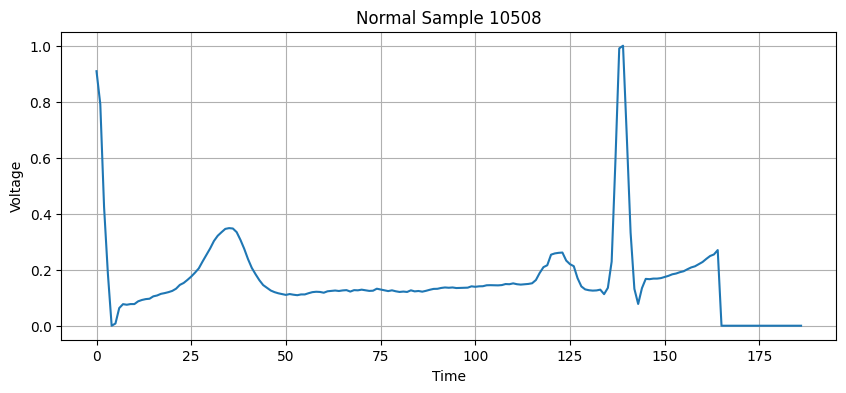

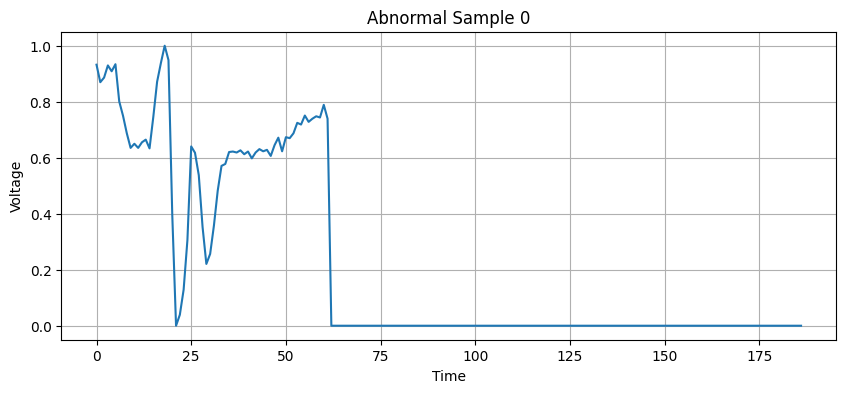

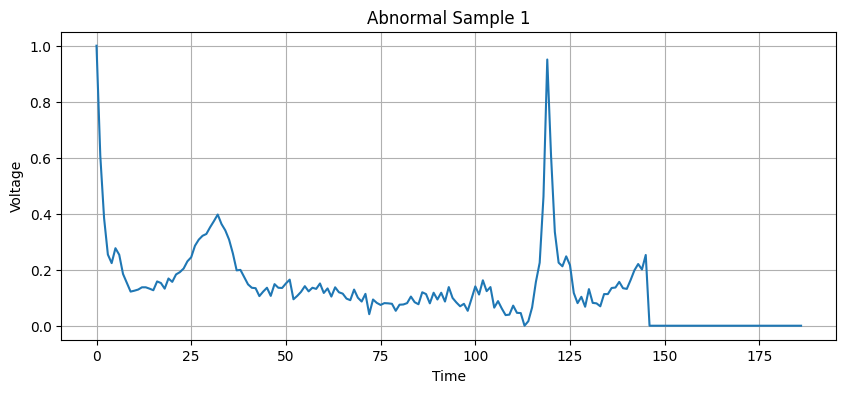

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import os
import cv2

# Define the path to the combined data CSV file
combined_data_path = '/content/drive/MyDrive/ECG/datas/combined_data.csv'  # Ensure this path is correct

# Load the combined data
data = pd.read_csv(combined_data_path, header=None)

# Features and labels
X = data.iloc[:, :-1].values  # Convert to numpy array
y = data.iloc[:, -1].values   # Convert to numpy array

# Display the first few rows of features and labels
print("Features (first 5 rows):\n", X[:5])
print("Labels (first 5 rows):\n", y[:5])

# Normalize the features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Display the first few rows of normalized features
print("Normalized Features (first 5 rows):\n", X_normalized[:5])

# Create the directory to save images if it does not exist
image_dir = '/content/drive/MyDrive/ECG/images/'
os.makedirs(image_dir, exist_ok=True)

# Function to save ECG data as image
def save_ecg_as_image(data, idx, label, image_dir):
    # Scale data to 0-255
    scaled_data = ((data[idx] - np.min(data[idx])) / (np.max(data[idx]) - np.min(data[idx])) * 255).astype(np.uint8)
    # Ensure the data is reshaped to 2D (e.g., 1D array to (length, 1))
    scaled_data = scaled_data.reshape(-1, 1)
    # Save as grayscale image
    image_path = os.path.join(image_dir, f'{label}_sample_{idx}.png')
    cv2.imwrite(image_path, scaled_data)
    return image_path

# Sample indices for normal and abnormal data
normal_indices = [i for i, label in enumerate(y) if label == 0][:3]
abnormal_indices = [i for i, label in enumerate(y) if label == 1][:3]

# Save individual normal samples as images
normal_image_paths = [save_ecg_as_image(X_normalized, idx, 'normal', image_dir) for idx in normal_indices]

# Save individual abnormal samples as images
abnormal_image_paths = [save_ecg_as_image(X_normalized, idx, 'abnormal', image_dir) for idx in abnormal_indices]

# Display the paths of saved images
print("Normal image paths:\n", normal_image_paths)
print("Abnormal image paths:\n", abnormal_image_paths)

# Plot sample normal ECG data
for idx in normal_indices:
    plt.figure(figsize=(10, 4))
    plt.plot(X[idx])
    plt.title(f'Normal Sample {idx}')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)
    plt.show()

# Plot sample abnormal ECG data
for idx in abnormal_indices:
    plt.figure(figsize=(10, 4))
    plt.plot(X[idx])
    plt.title(f'Abnormal Sample {idx}')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)
    plt.show()


#Generate High-Resolution Images from the Original and Converted Data

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import io
from skimage.metrics import structural_similarity as ssim
import cv2

# Function to save plots as high-resolution images
def save_plot_as_image(data, title, file_path, dpi=300):
    plt.figure(figsize=(15, 5))
    plt.plot(data, linestyle=':', color='orange')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.grid(True)
    plt.savefig(file_path, dpi=dpi)
    plt.close()

# Save images for the first few samples in the original and converted data with higher resolution
for i in range(3):
    save_plot_as_image(original_normal_data.iloc[i, :-1].values, f'Original Normal Sample {i}', f'original_normal_sample_{i}.png')
    save_plot_as_image(converted_normal_data.iloc[i].values, f'Converted Normal Sample {i}', f'converted_normal_sample_{i}.png')
    save_plot_as_image(original_abnormal_data.iloc[i, :-1].values, f'Original Abnormal Sample {i}', f'original_abnormal_sample_{i}.png')
    save_plot_as_image(converted_abnormal_data.iloc[i].values, f'Converted Abnormal Sample {i}', f'converted_abnormal_sample_{i}.png')


#Convert the Images Back to CSV

In [5]:
import cv2

# Function to read image and convert back to ECG data
def image_to_ecg_data(image_path, scaler, num_features):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Flatten the 2D image back to 1D signal
    ecg_data_flattened = image.flatten()

    # Reshape the flattened array back to the original shape (1, num_features)
    ecg_data_reshaped = ecg_data_flattened.reshape(1, num_features)

    # Convert back to original scale using inverse transform
    ecg_data_original = scaler.inverse_transform(ecg_data_reshaped)

    return ecg_data_original.flatten()

# Define the number of features (based on the original data)
num_features = X.shape[1]

# Convert the images back to ECG data
normal_ecg_data = [image_to_ecg_data(path, scaler, num_features) for path in normal_image_paths]
abnormal_ecg_data = [image_to_ecg_data(path, scaler, num_features) for path in abnormal_image_paths]

# Save the converted ECG data back to CSV
normal_csv_path = f'{data_dir}normal_samples_converted.csv'
abnormal_csv_path = f'{data_dir}abnormal_samples_converted.csv'

# Save to CSV
pd.DataFrame(normal_ecg_data).to_csv(normal_csv_path, header=False, index=False)
pd.DataFrame(abnormal_ecg_data).to_csv(abnormal_csv_path, header=False, index=False)

# Display the first few rows of the converted data
print("Converted Normal ECG Data (first 5 rows):\n", pd.DataFrame(normal_ecg_data).head())
print("Converted Abnormal ECG Data (first 5 rows):\n", pd.DataFrame(abnormal_ecg_data).head())


Converted Normal ECG Data (first 5 rows):
          0      1      2     3     4     5     6          7          8    \
0  96.446224  229.0   91.0  13.0  11.0  32.0  33.0  29.565702  27.809954   
1  96.446224  202.0   95.0  29.0   0.0  43.0  72.0  74.899779  82.436649   
2  73.148327  201.0  107.0  47.0   0.0   1.0  16.0  18.724945  18.871040   

         9    ...  177  178  179  180  181  182  183  184  185  186  
0  27.936651  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  87.800902  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  18.957013  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[3 rows x 187 columns]
Converted Abnormal ECG Data (first 5 rows):
          0      1      2      3      4      5      6           7    \
0  79.160687  221.0  225.0  237.0  231.0  238.0  204.0  191.191540   
1  96.446224  154.0   97.0   64.0   57.0   70.0   64.0   46.319600   
2  96.446224  242.0  235.0  217.0  201.0  187.0  171.0  174.437642   

          8           

#Compare Images and Calculate Errors

Comparing Original Normal Sample 0 with Converted Normal Sample 0
Comparing Original Abnormal Sample 0 with Converted Abnormal Sample 0
Comparing Original Normal Sample 1 with Converted Normal Sample 1
Comparing Original Abnormal Sample 1 with Converted Abnormal Sample 1
Comparing Original Normal Sample 2 with Converted Normal Sample 2
Comparing Original Abnormal Sample 2 with Converted Abnormal Sample 2
       Type  Sample      SSIM         MSE
0    Normal       0  0.937864  267.866222
1  Abnormal       0  0.940540  263.227485
2    Normal       1  0.958003  216.194471
3  Abnormal       1  0.935643  275.777711
4    Normal       2  0.937465  266.619408
5  Abnormal       2  0.937393  272.036892


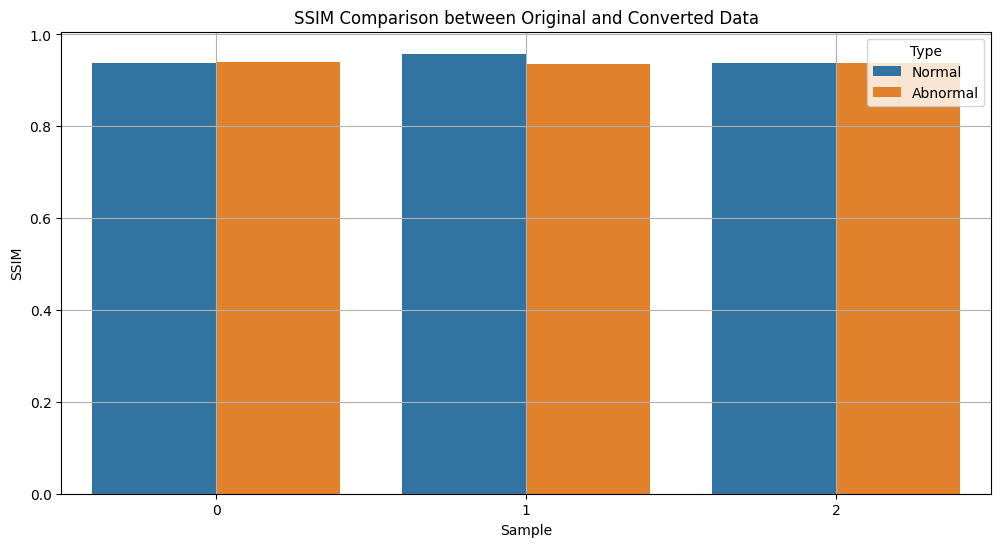

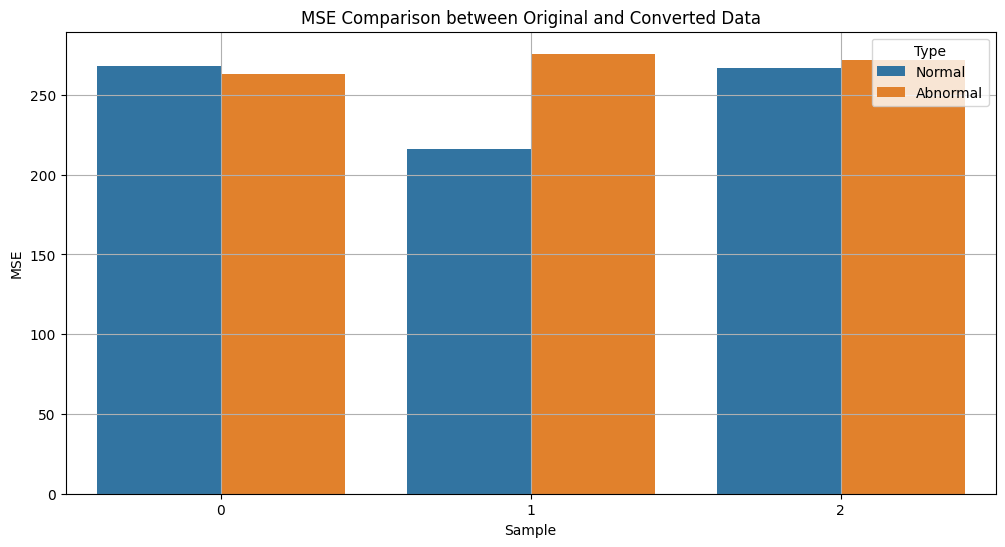

In [6]:
# Function to compute Mean Squared Error (MSE)
def mse(imageA, imageB):
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(imageA.shape[0] * imageA.shape[1])
    return err

# Function to compare images using SSIM and MSE
def compare_images(imageA, imageB, title):
    imageA_gray = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
    imageB_gray = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

    ssim_score, diff = ssim(imageA_gray, imageB_gray, full=True)
    diff = (diff * 255).astype("uint8")

    mse_score = mse(imageA_gray, imageB_gray)

    return ssim_score, mse_score, diff

# Load and compare images for the first few samples
results = []

for i in range(3):
    original_normal_img = cv2.imread(f'original_normal_sample_{i}.png')
    converted_normal_img = cv2.imread(f'converted_normal_sample_{i}.png')
    original_abnormal_img = cv2.imread(f'original_abnormal_sample_{i}.png')
    converted_abnormal_img = cv2.imread(f'converted_abnormal_sample_{i}.png')

    print(f'Comparing Original Normal Sample {i} with Converted Normal Sample {i}')
    ssim_score, mse_score, diff = compare_images(original_normal_img, converted_normal_img, f'Normal Sample {i}')
    results.append(('Normal', i, ssim_score, mse_score))

    print(f'Comparing Original Abnormal Sample {i} with Converted Abnormal Sample {i}')
    ssim_score, mse_score, diff = compare_images(original_abnormal_img, converted_abnormal_img, f'Abnormal Sample {i}')
    results.append(('Abnormal', i, ssim_score, mse_score))

# Convert results to a DataFrame
results_df = pd.DataFrame(results, columns=['Type', 'Sample', 'SSIM', 'MSE'])

# Display the results
print(results_df)

# Plot SSIM for Normal and Abnormal samples separately
plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='SSIM', hue='Type', data=results_df)
plt.title('SSIM Comparison between Original and Converted Data')
plt.ylabel('SSIM')
plt.xlabel('Sample')
plt.legend(title='Type')
plt.grid(True)
plt.show()

# Plot MSE for Normal and Abnormal samples separately
plt.figure(figsize=(12, 6))
sns.barplot(x='Sample', y='MSE', hue='Type', data=results_df)
plt.title('MSE Comparison between Original and Converted Data')
plt.ylabel('MSE')
plt.xlabel('Sample')
plt.legend(title='Type')
plt.grid(True)
plt.show()


#Calculate Numerical Differences

In [7]:
# Simulate re-converted data by using the existing converted data
reconverted_normal_data = converted_normal_data.copy()
reconverted_abnormal_data = converted_abnormal_data.copy()

# Extract the first three samples for comparison to avoid shape mismatch
original_normal_sample = original_normal_data.iloc[:3, :-1].values
original_abnormal_sample = original_abnormal_data.iloc[:3, :-1].values

# Calculate the errors between original CSV data and re-converted data
normal_error_csv = original_normal_sample - reconverted_normal_data.values
abnormal_error_csv = original_abnormal_sample - reconverted_abnormal_data.values


#Plot

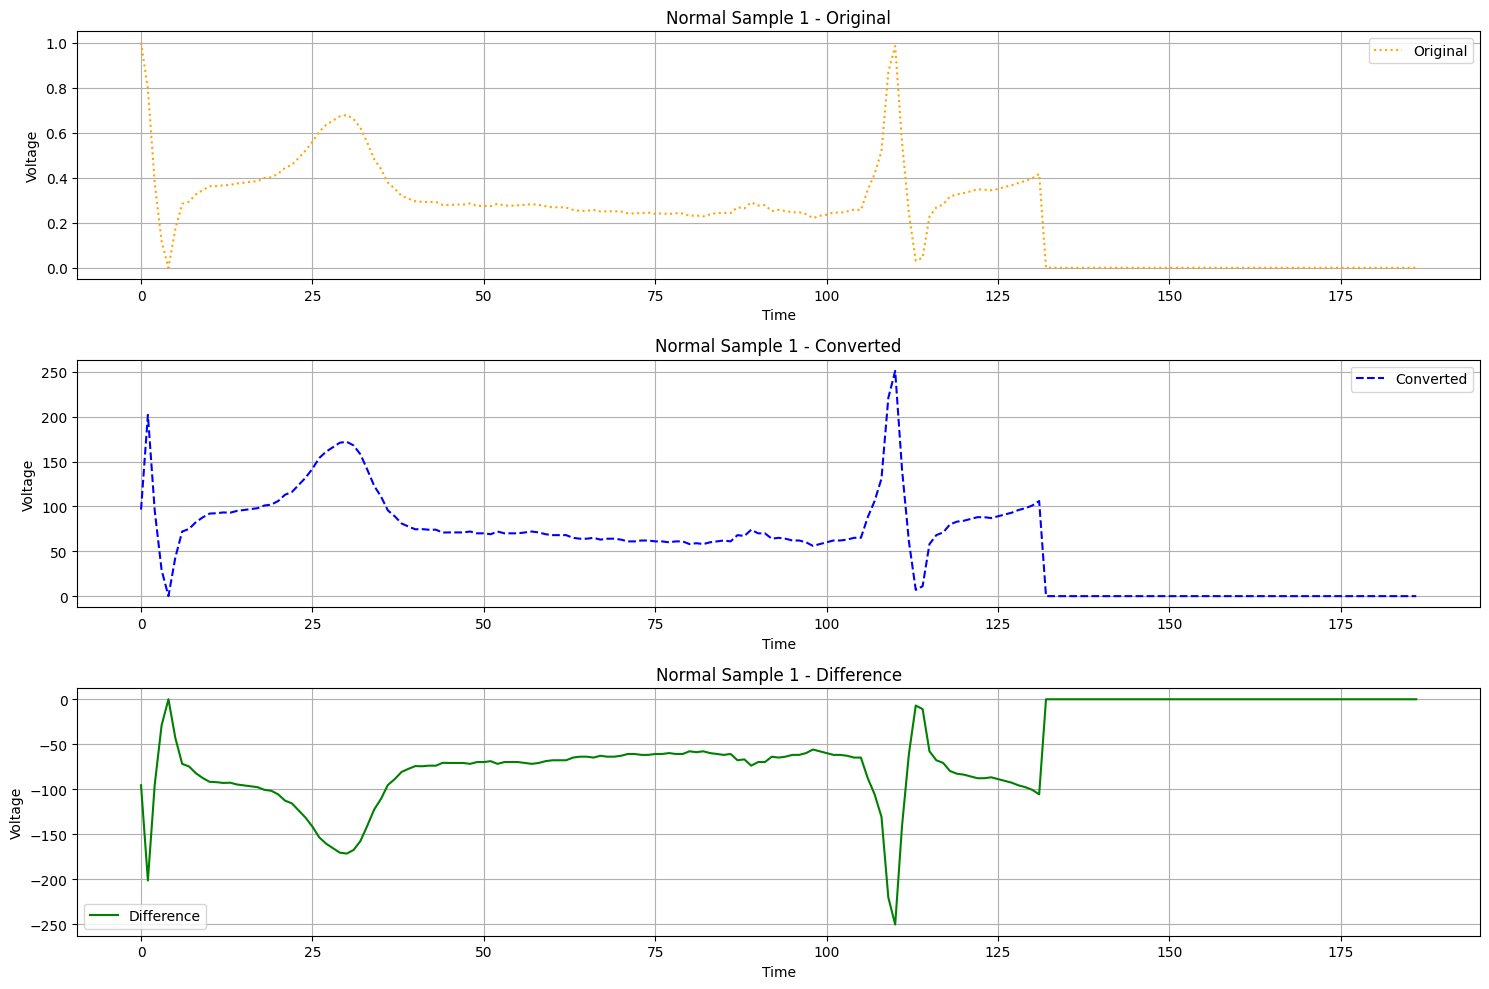

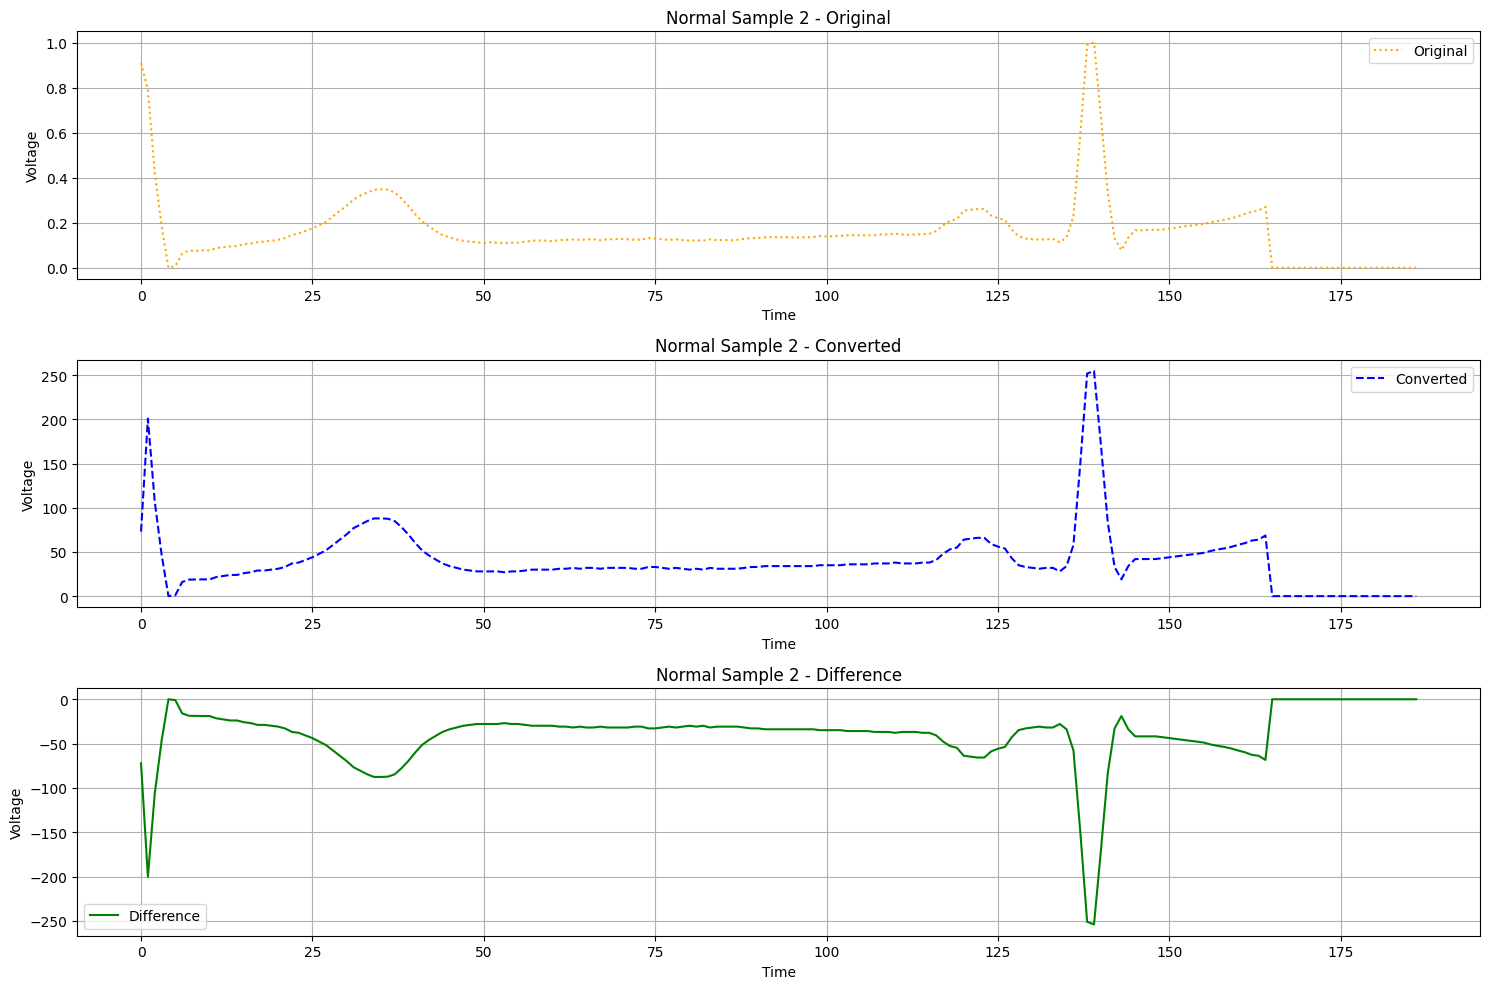

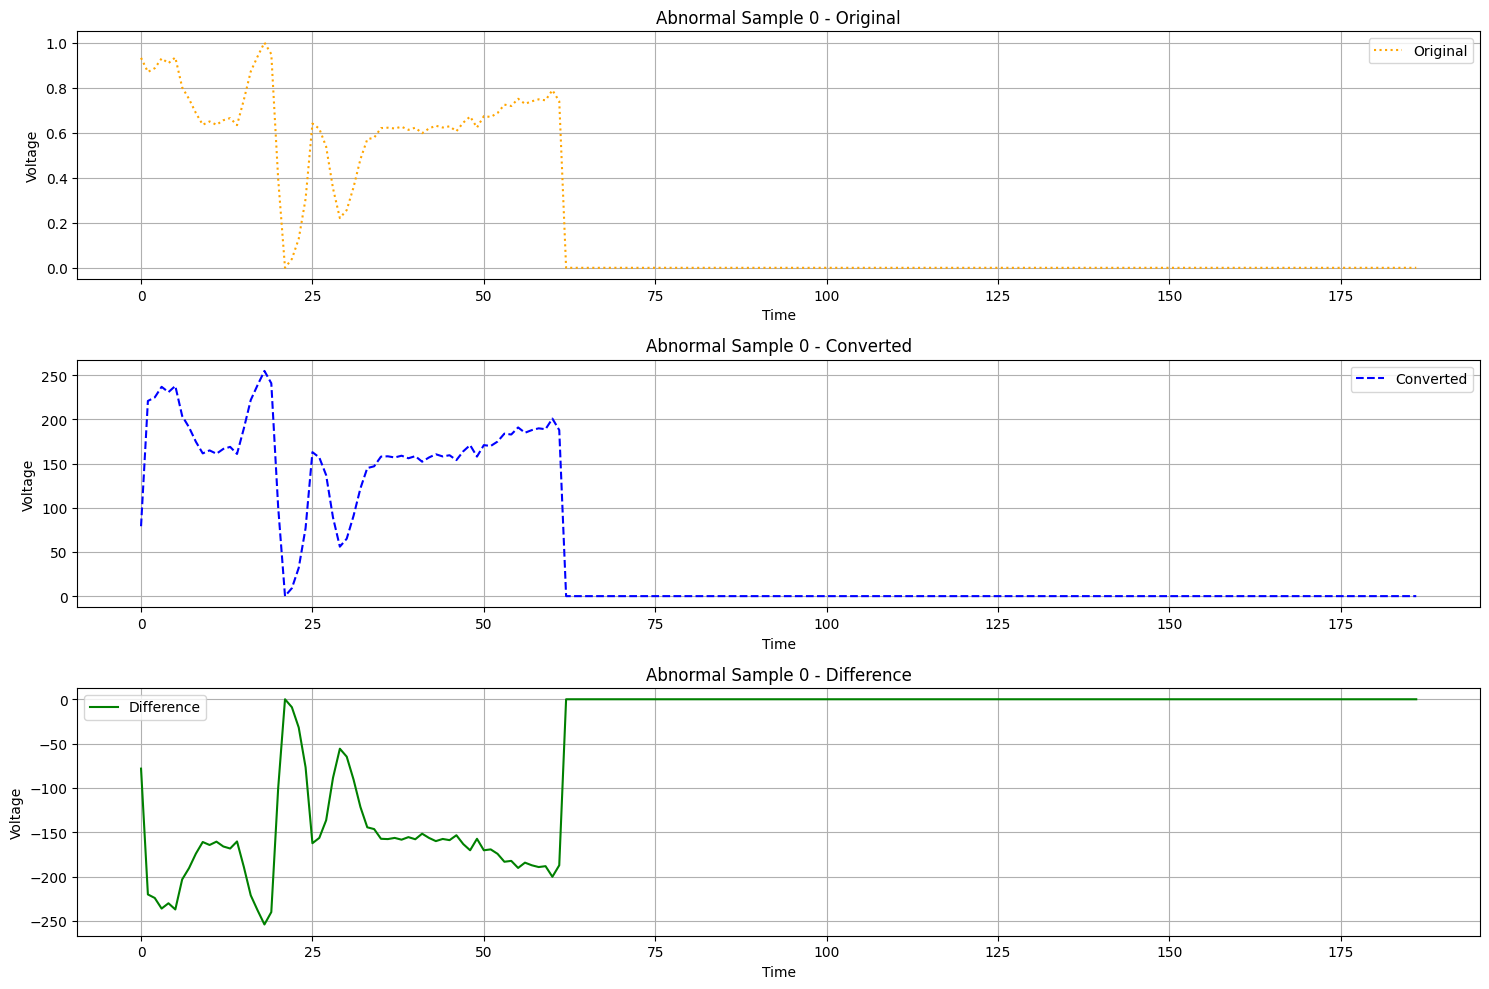

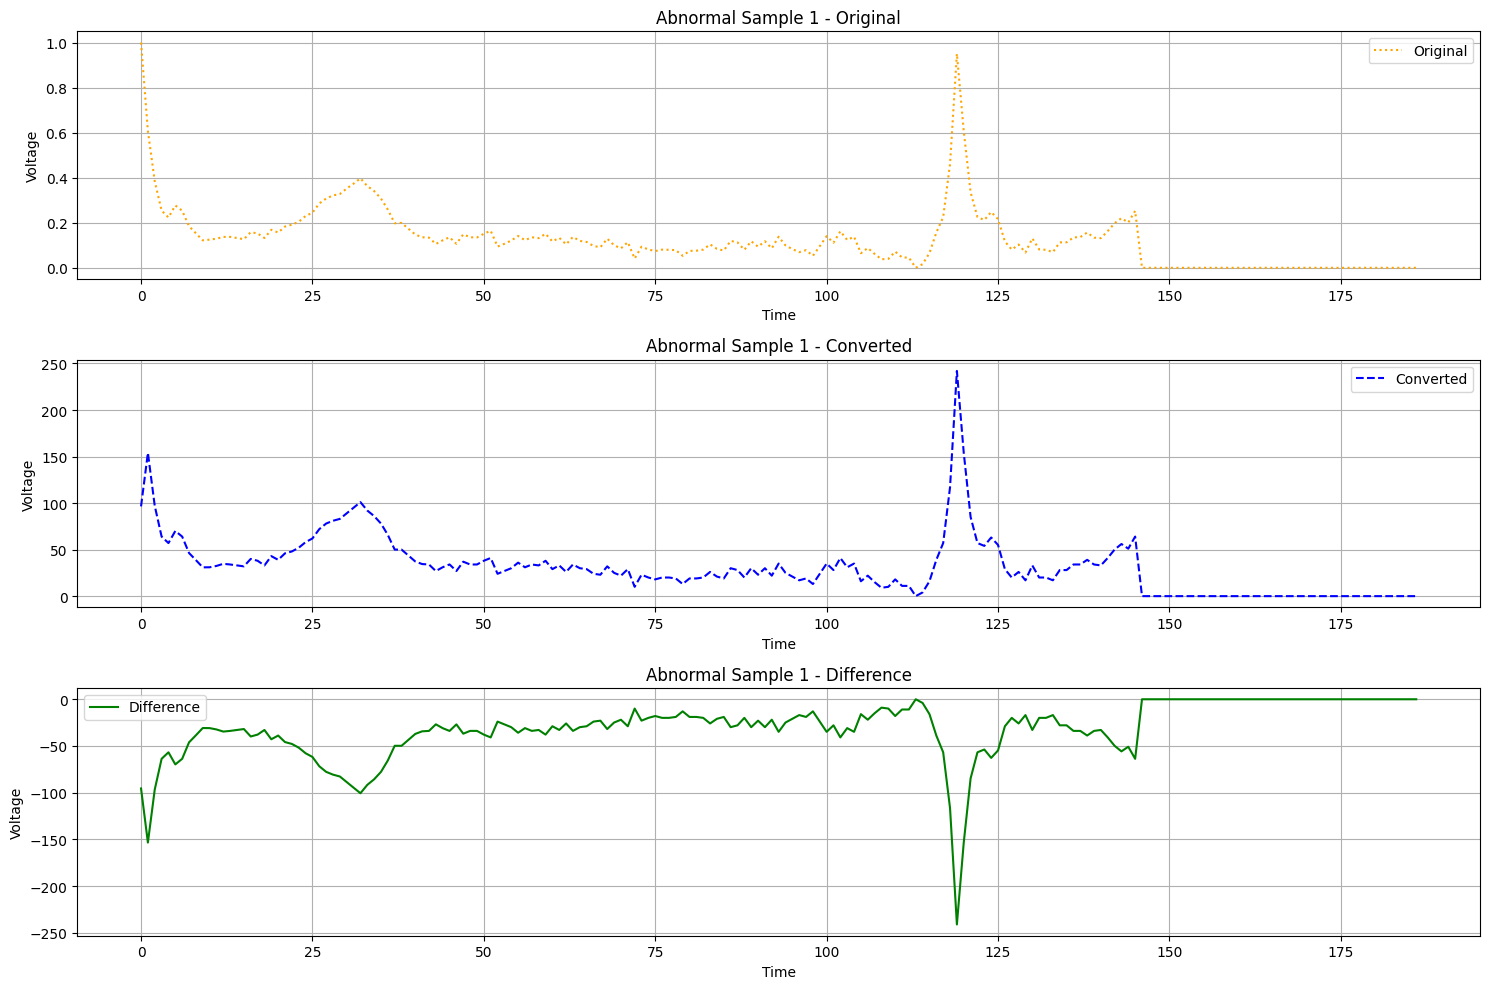

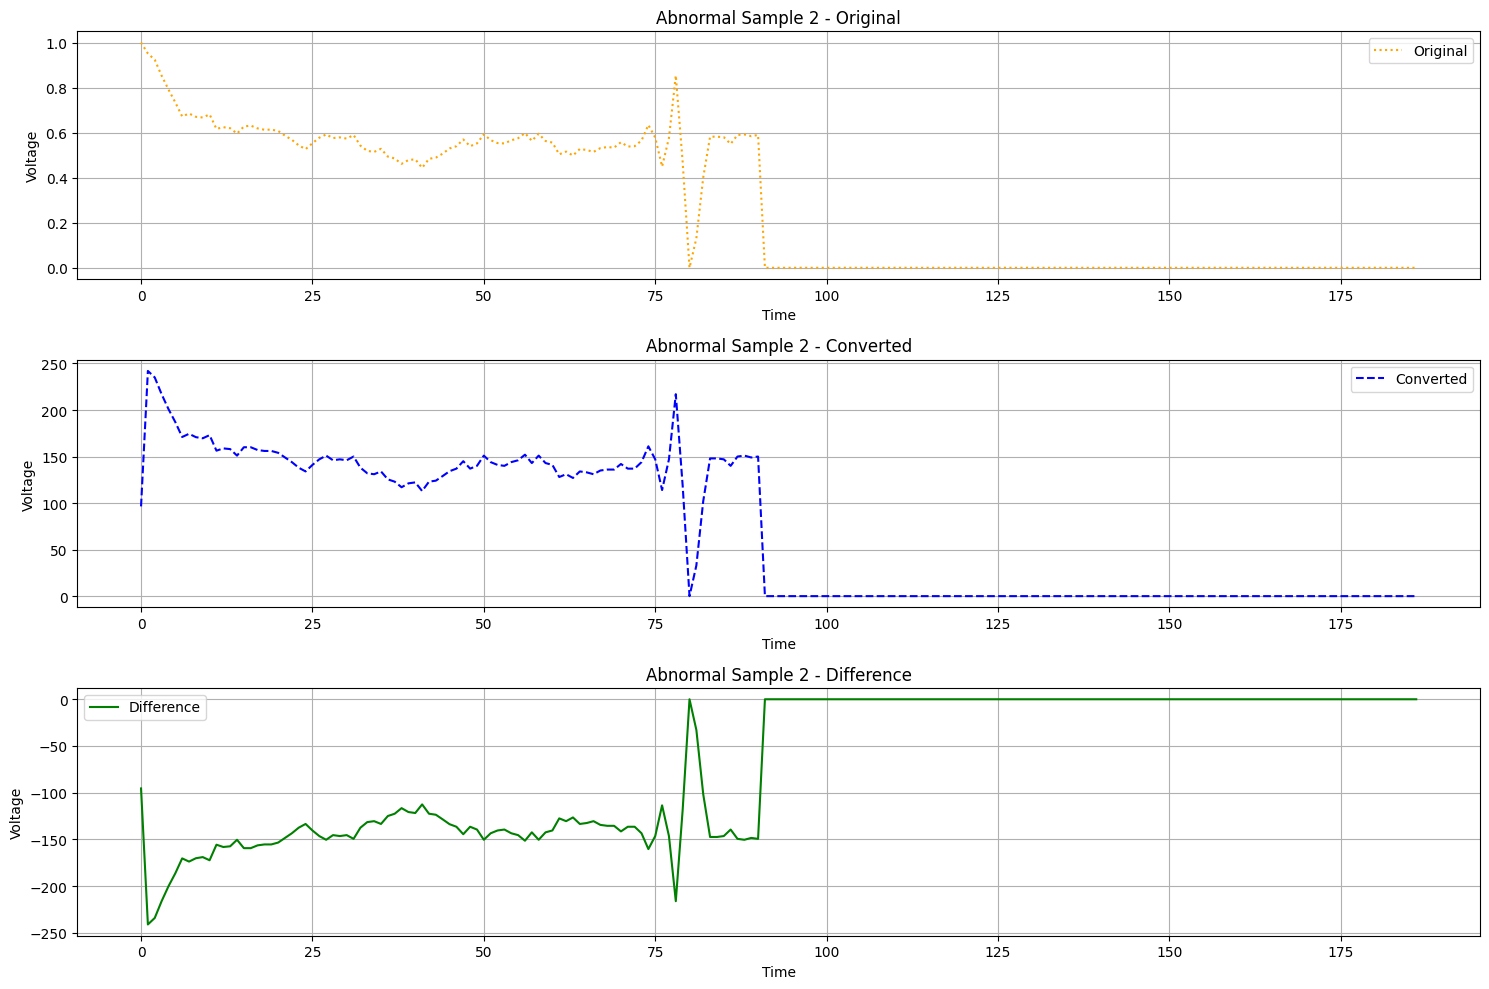

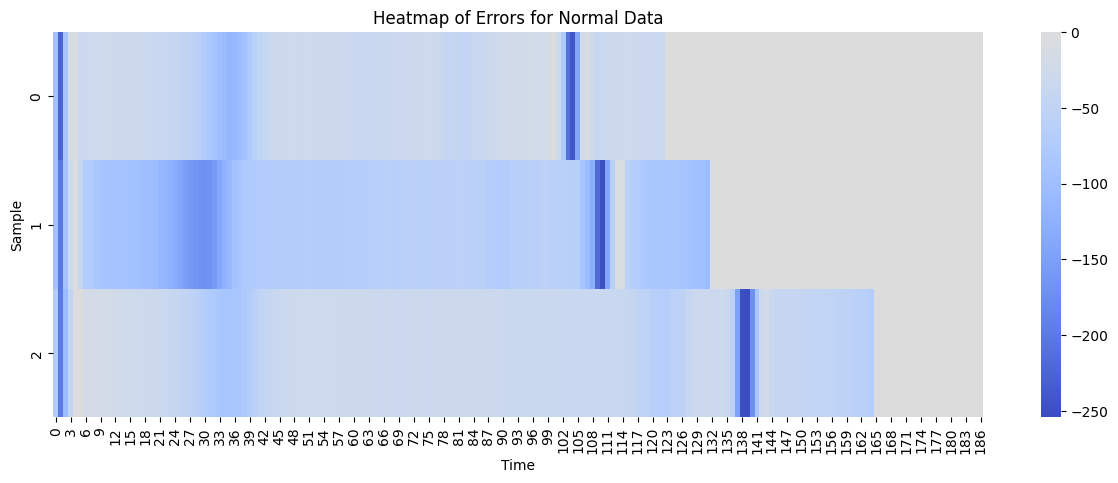

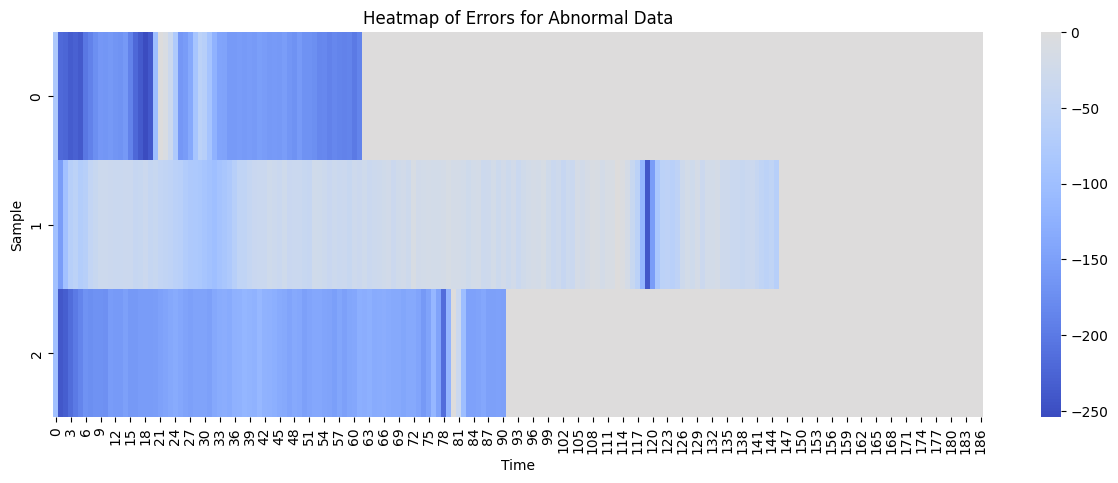

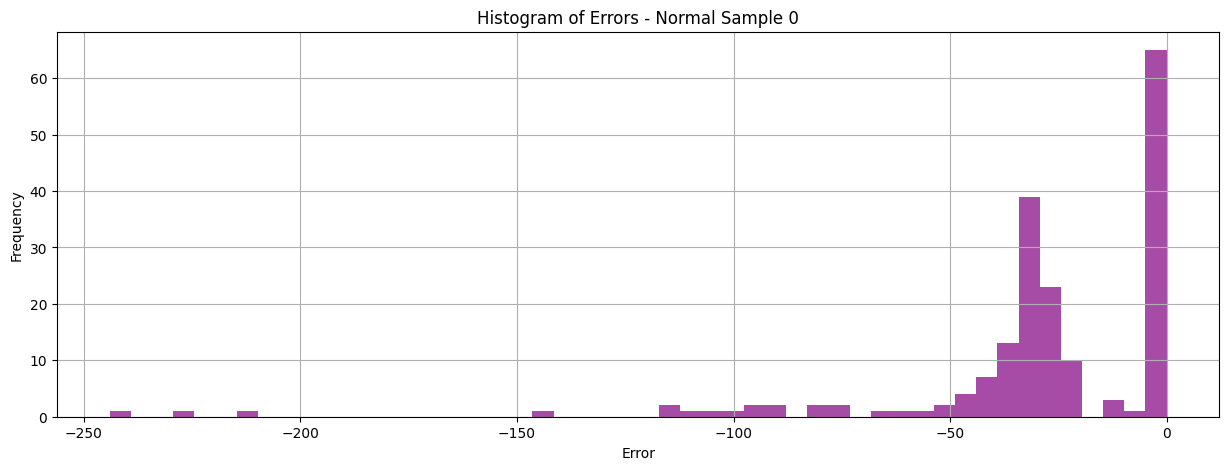

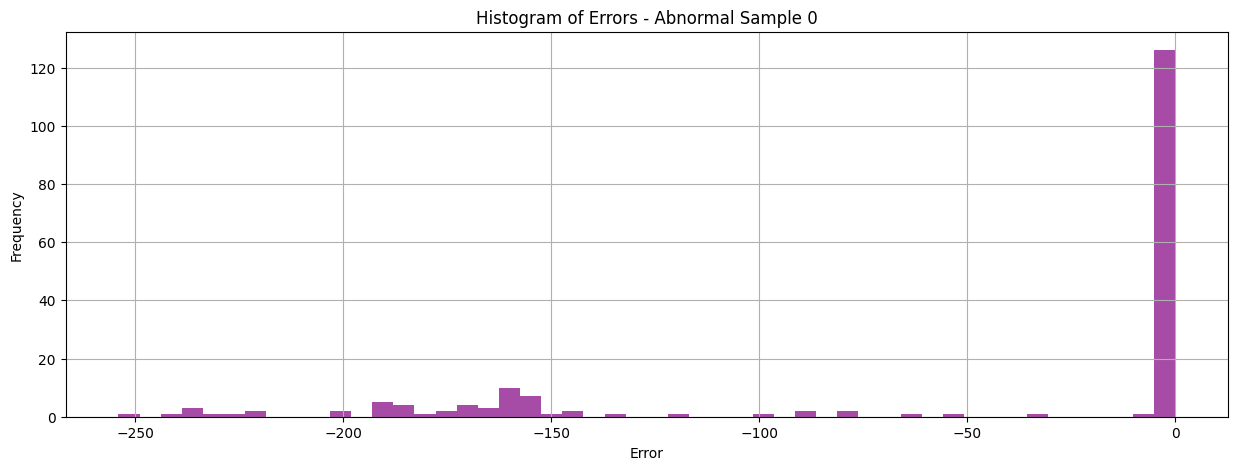

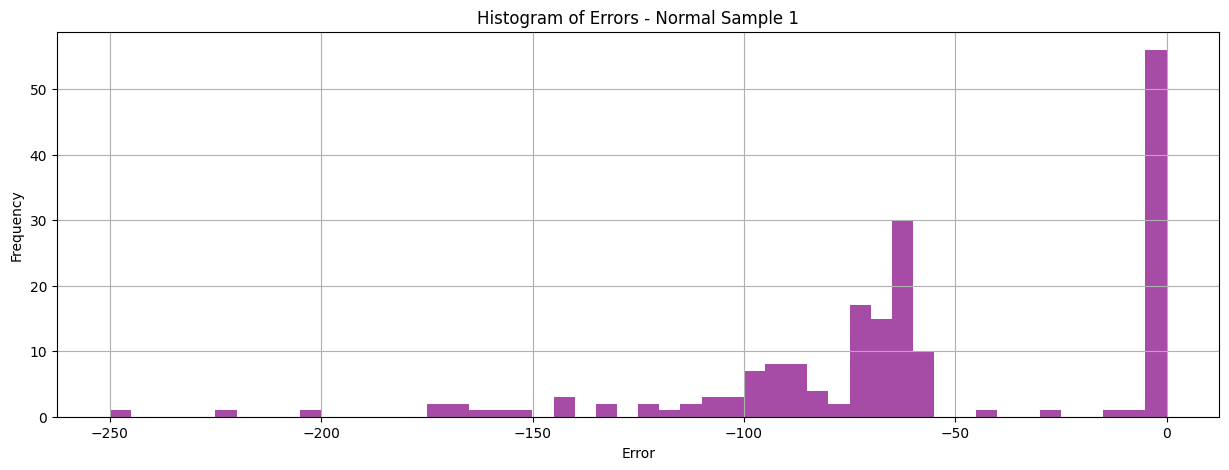

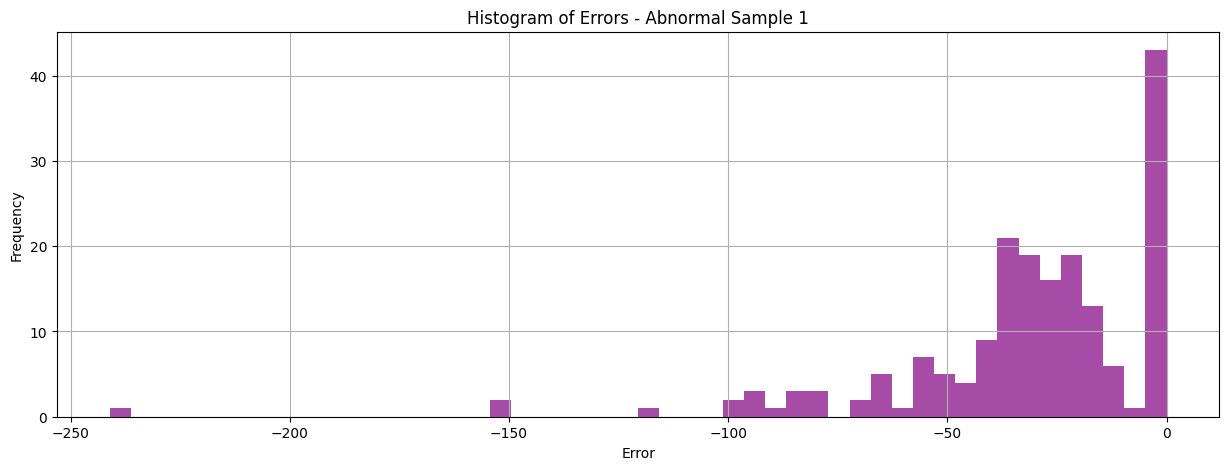

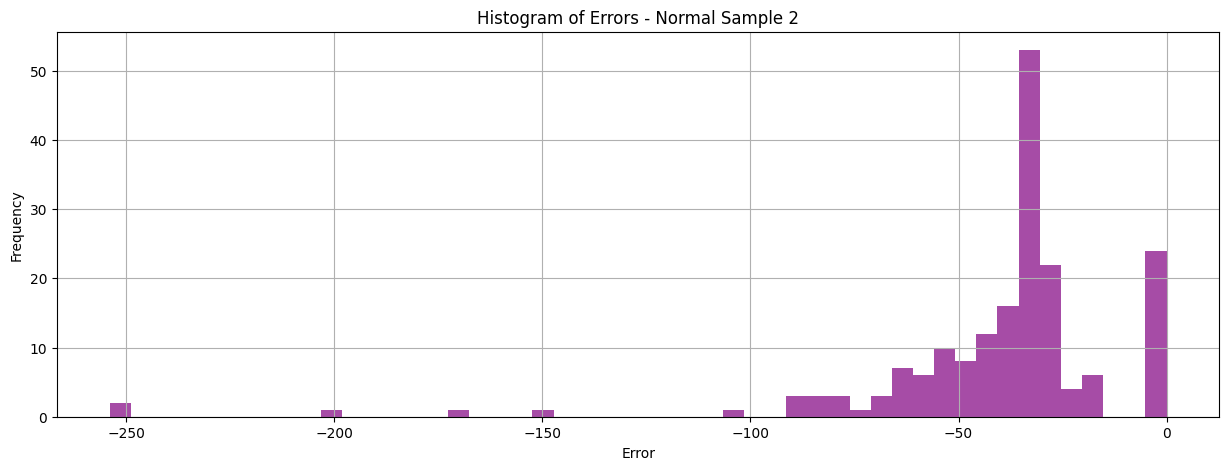

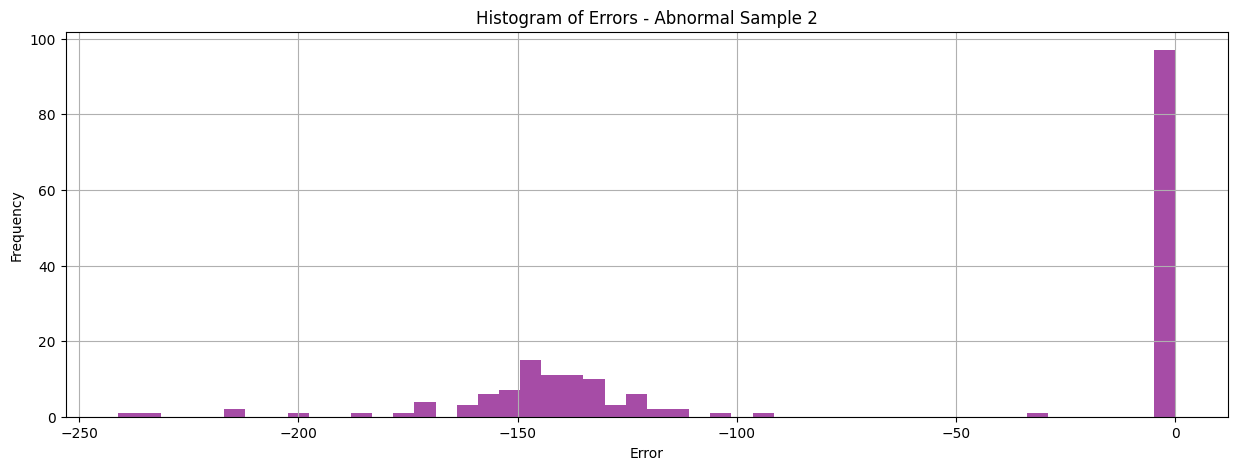

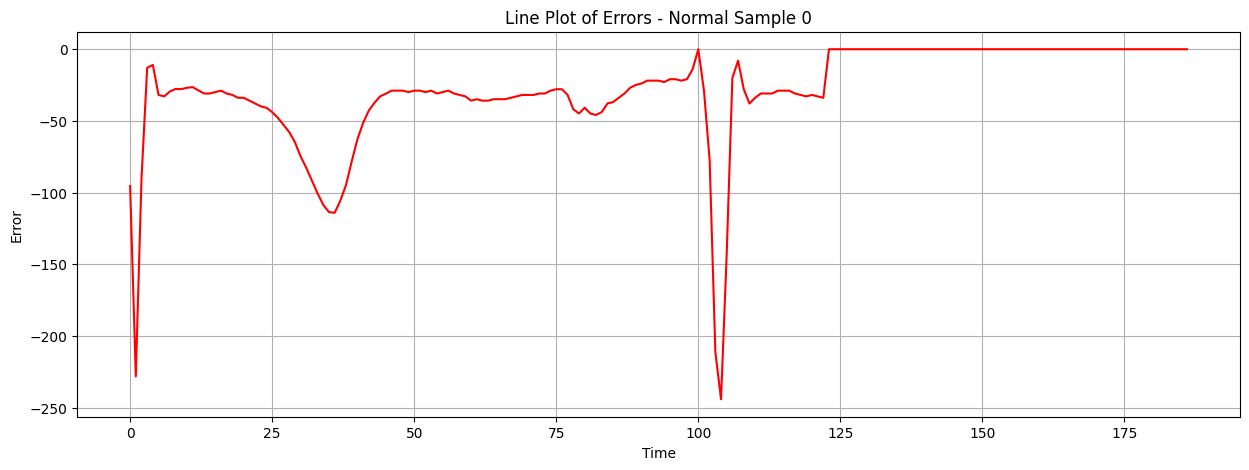

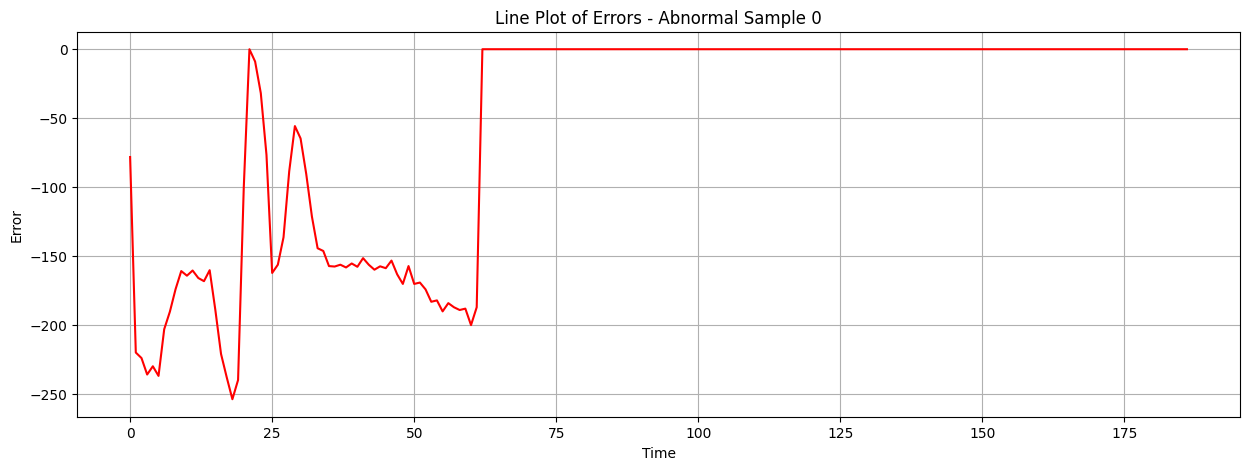

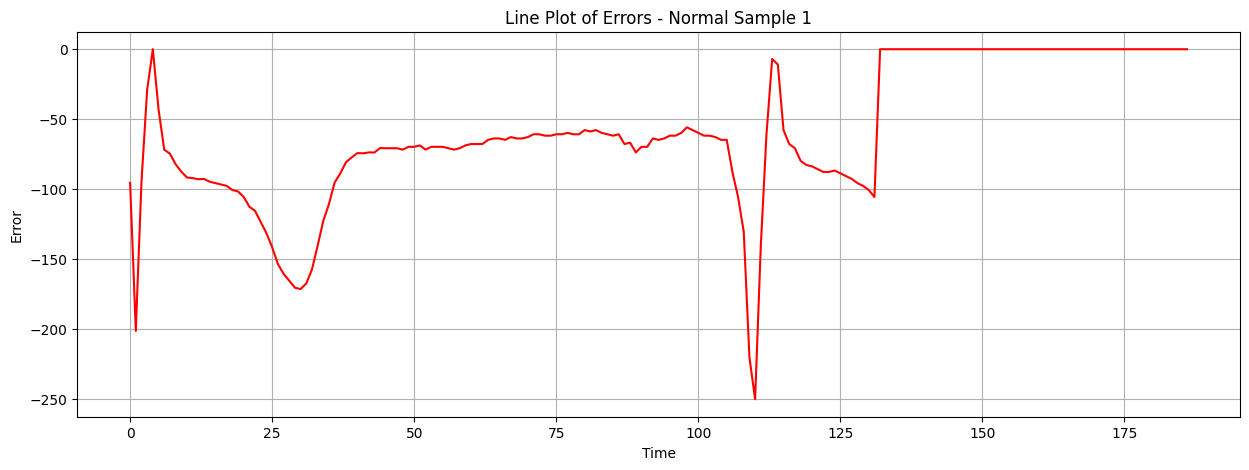

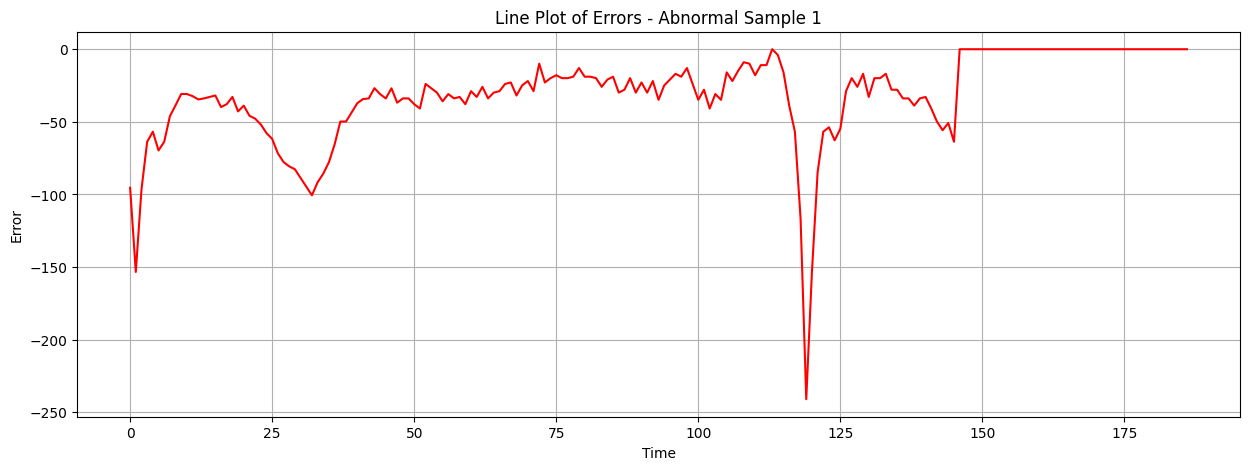

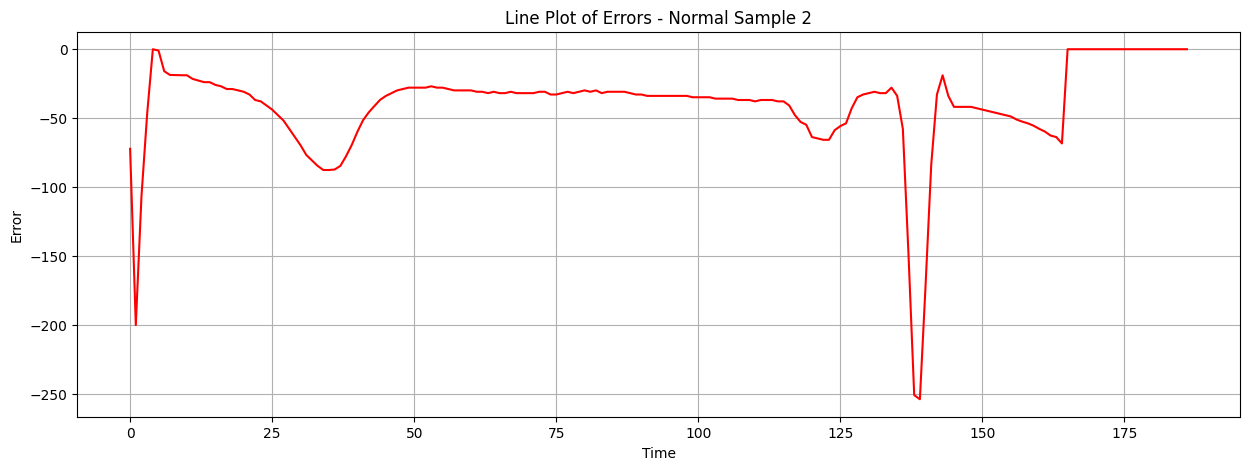

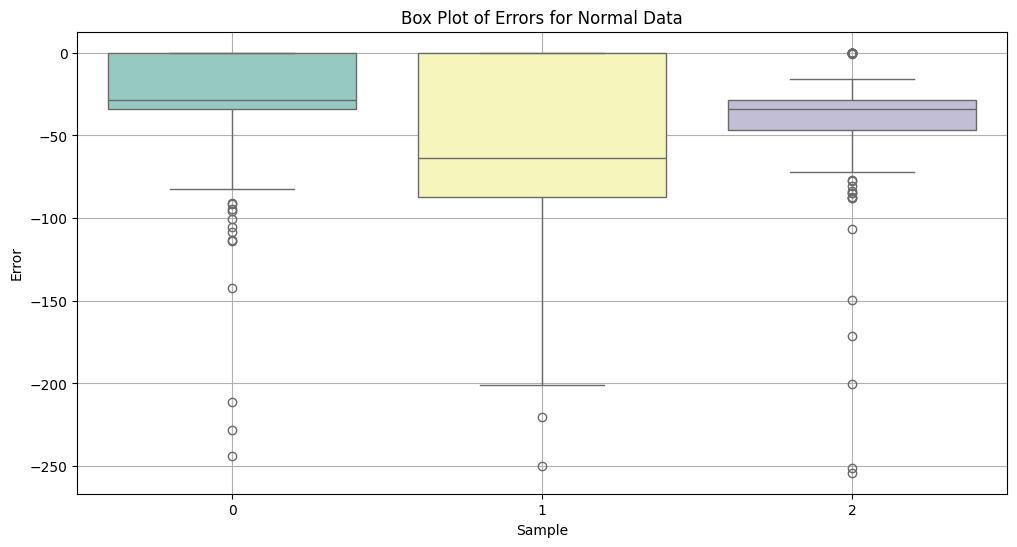

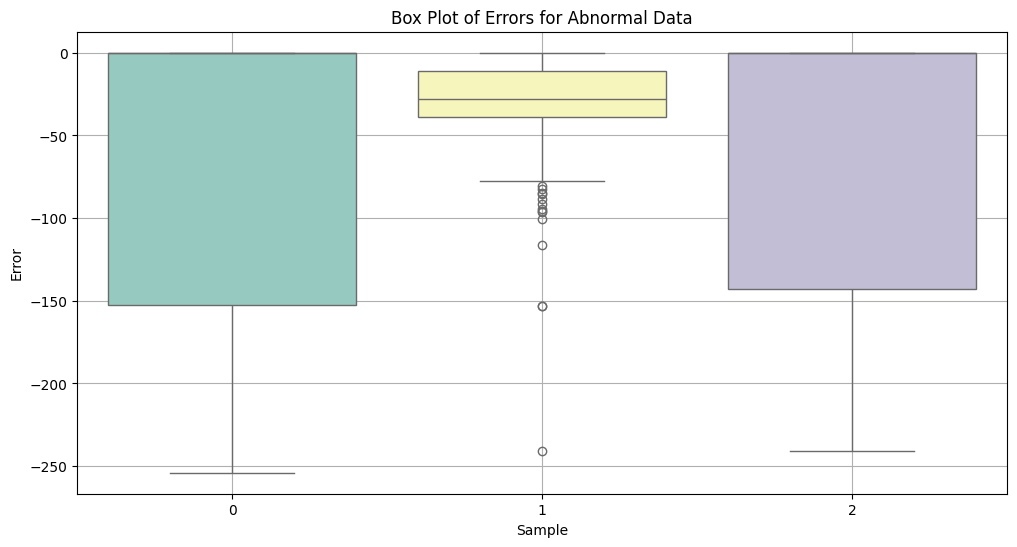


Normal Error Statistics:
            mean        std  max         min
count   3.000000   3.000000  3.0    3.000000
mean  -42.916911  40.313423  0.0 -249.350372
std    15.341462   7.772427  0.0    5.015356
min   -59.421718  34.867757  0.0 -254.000000
25%   -49.829417  35.862946  0.0 -252.007730
50%   -40.237115  36.858135  0.0 -250.015461
75%   -34.664508  43.036255  0.0 -247.025559
max   -29.091901  49.214376  0.0 -244.035656

Abnormal Error Statistics:
            mean        std  max         min
count   3.000000   3.000000  3.0    3.000000
mean  -51.403816  62.472061  0.0 -245.365873
std    19.093875  26.884739  0.0    7.477373
min   -69.740583  31.643095  0.0 -254.000000
25%   -61.288911  53.186028  0.0 -247.524617
50%   -52.837238  74.728962  0.0 -241.049233
75%   -42.235432  77.886545  0.0 -241.048810
max   -31.633626  81.044127  0.0 -241.048387


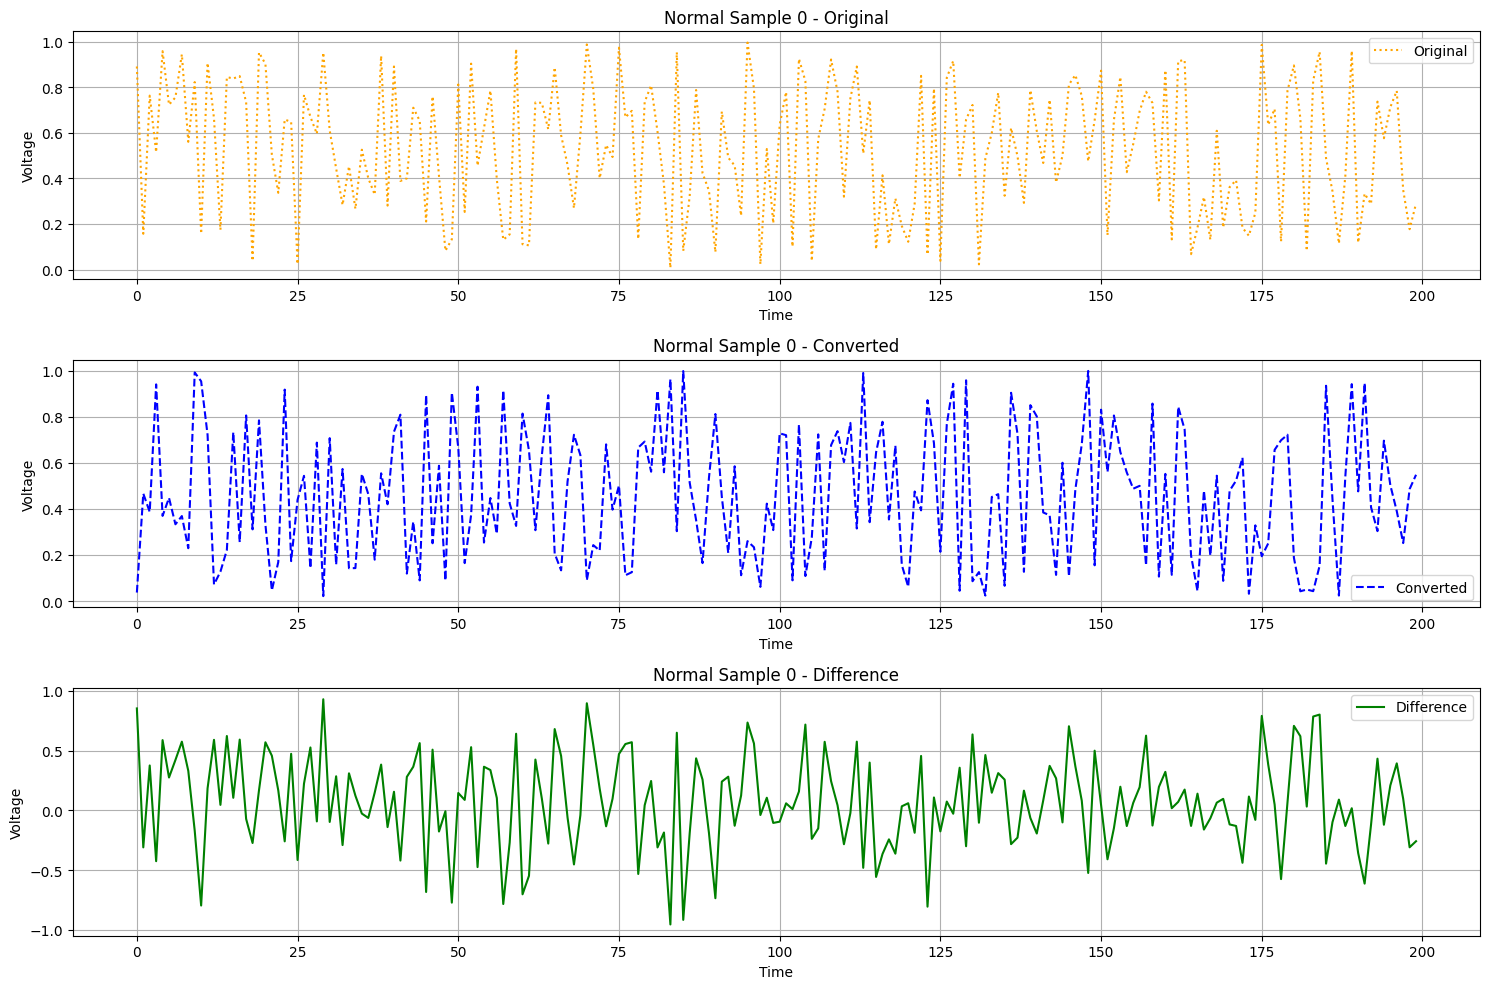

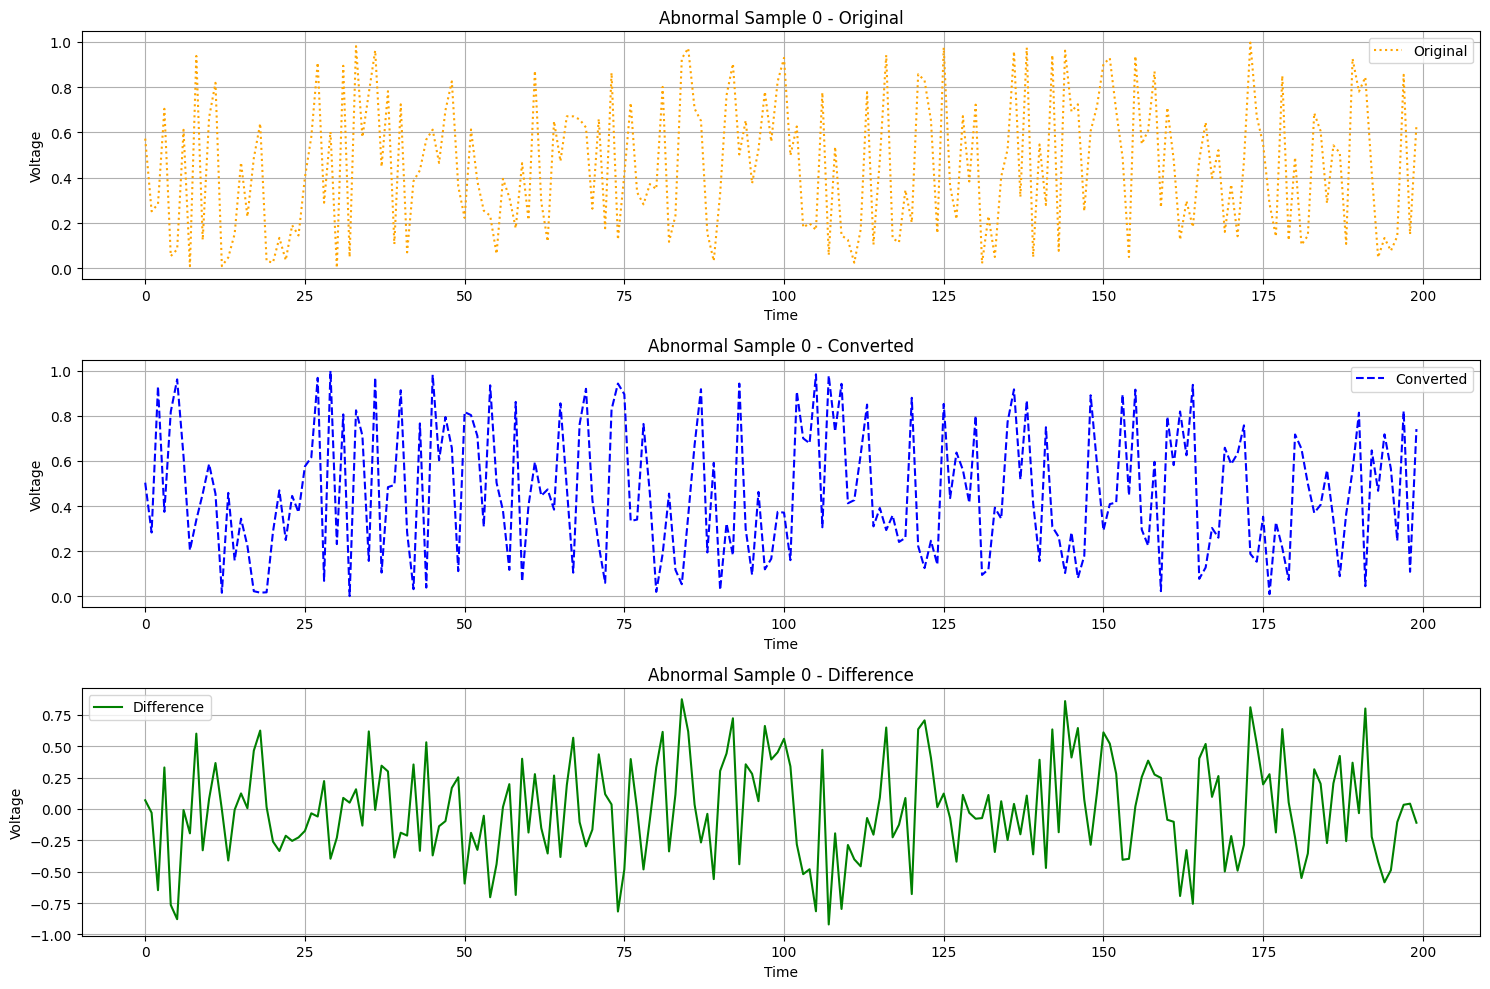

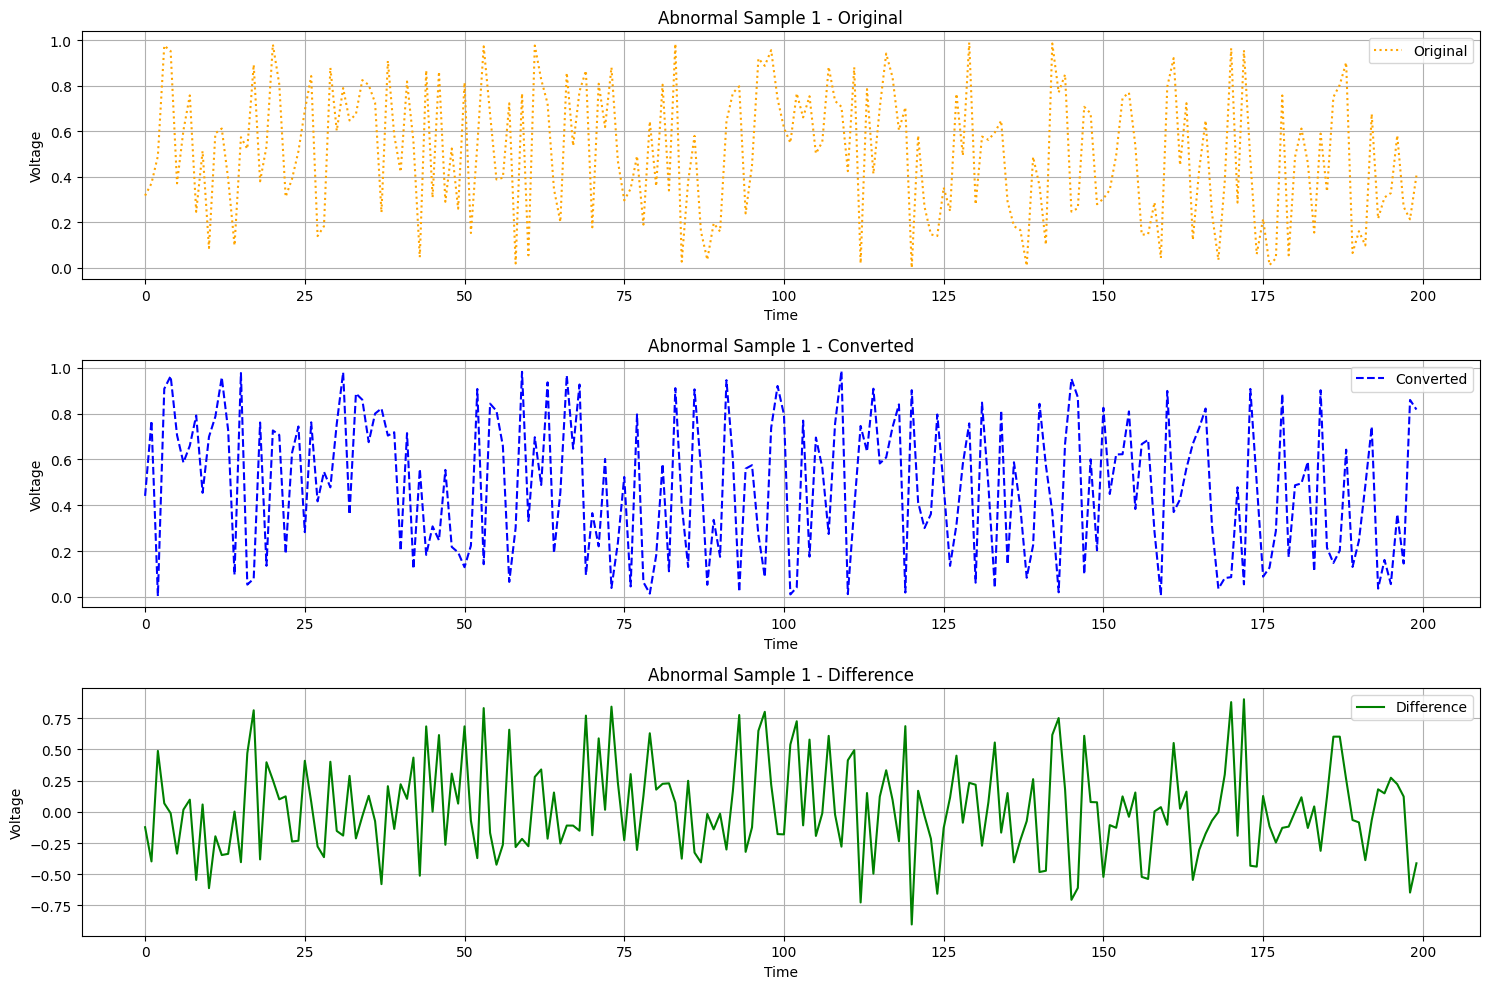

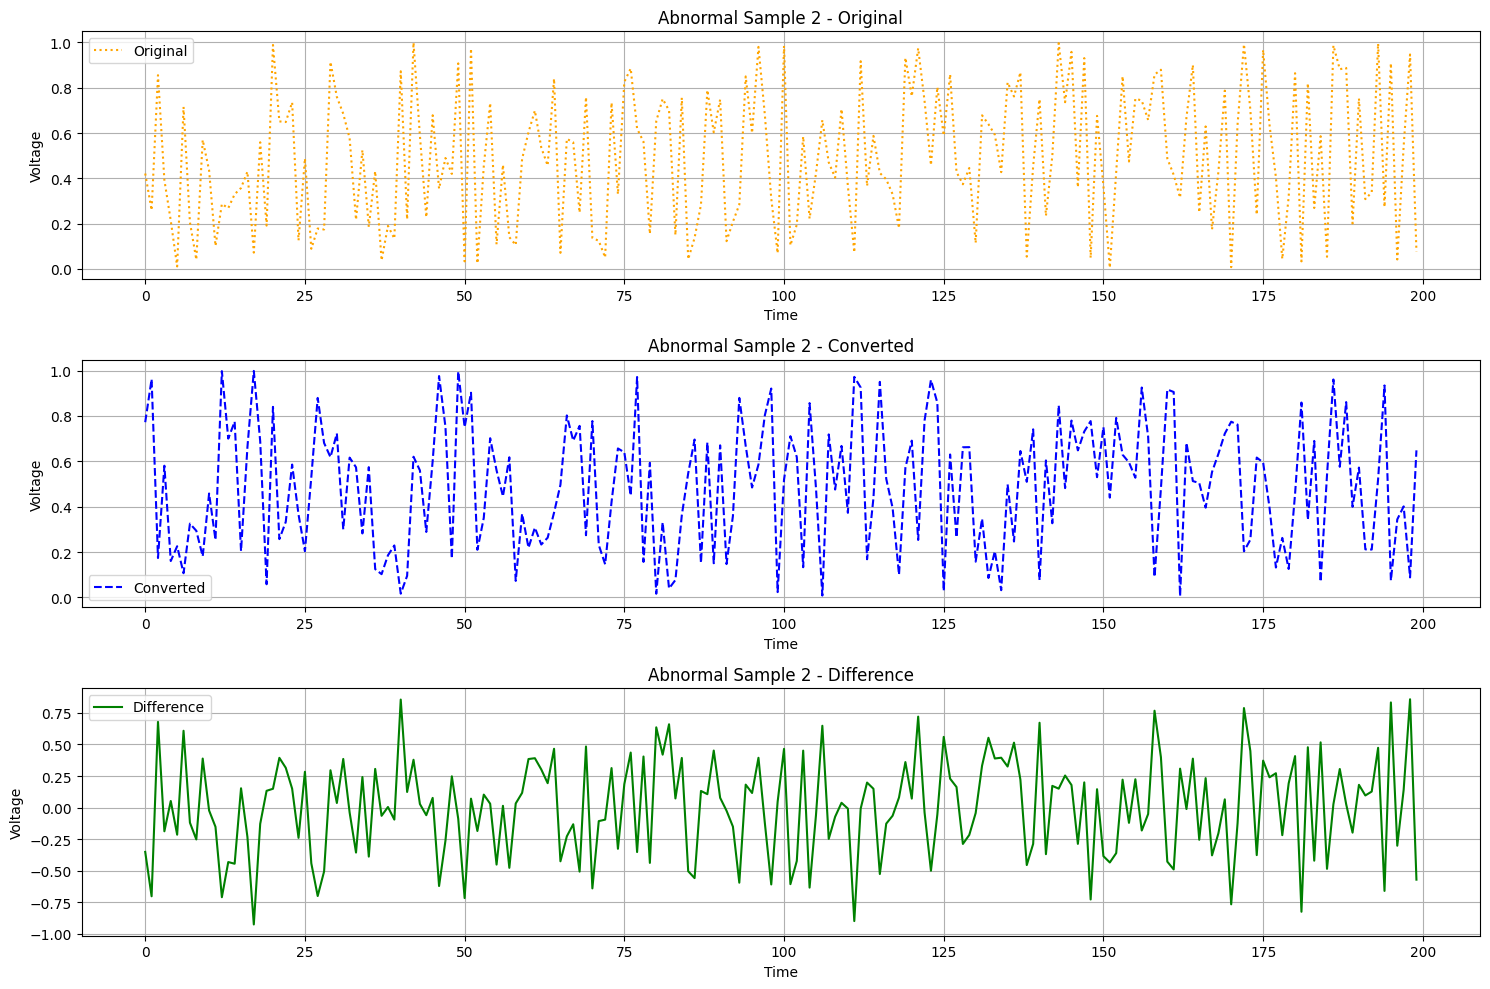

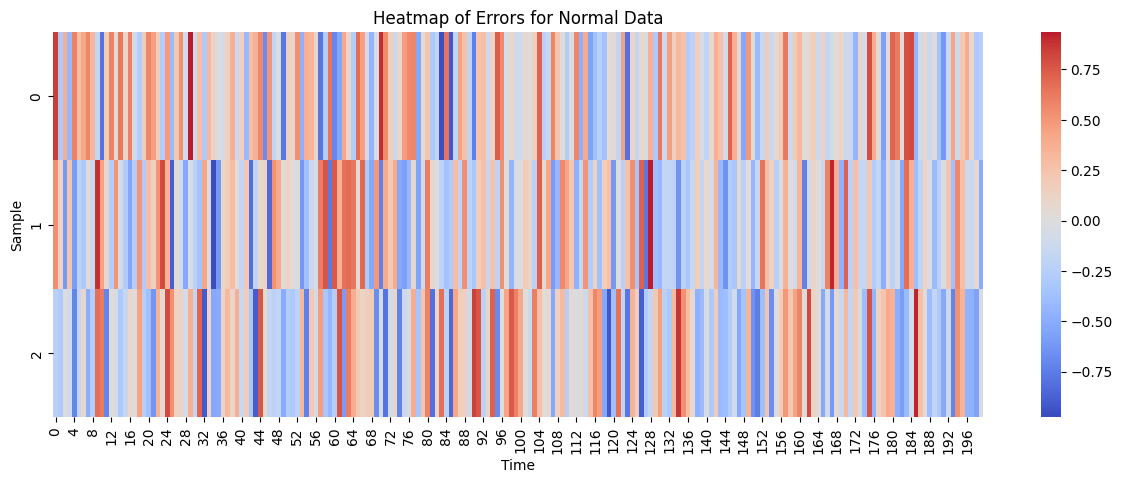

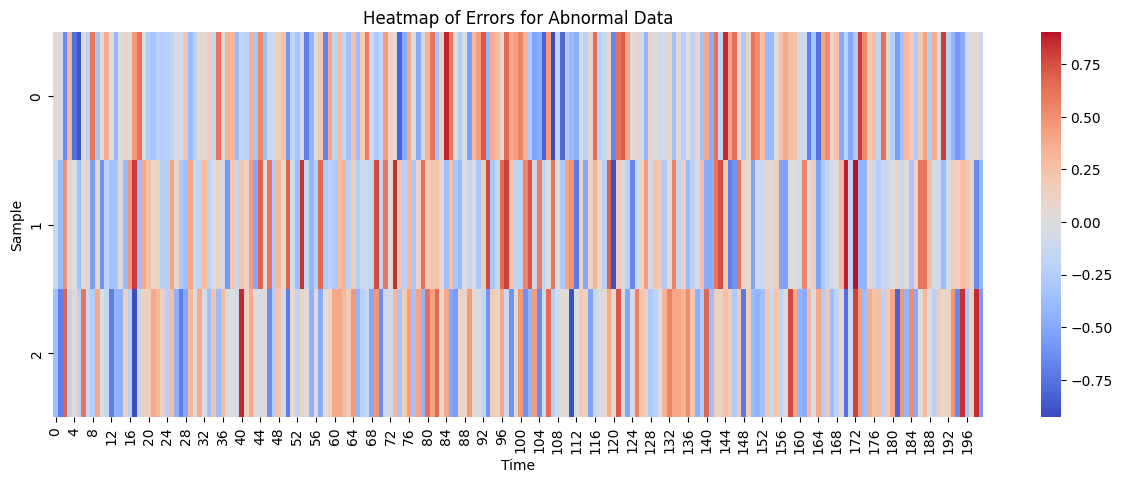

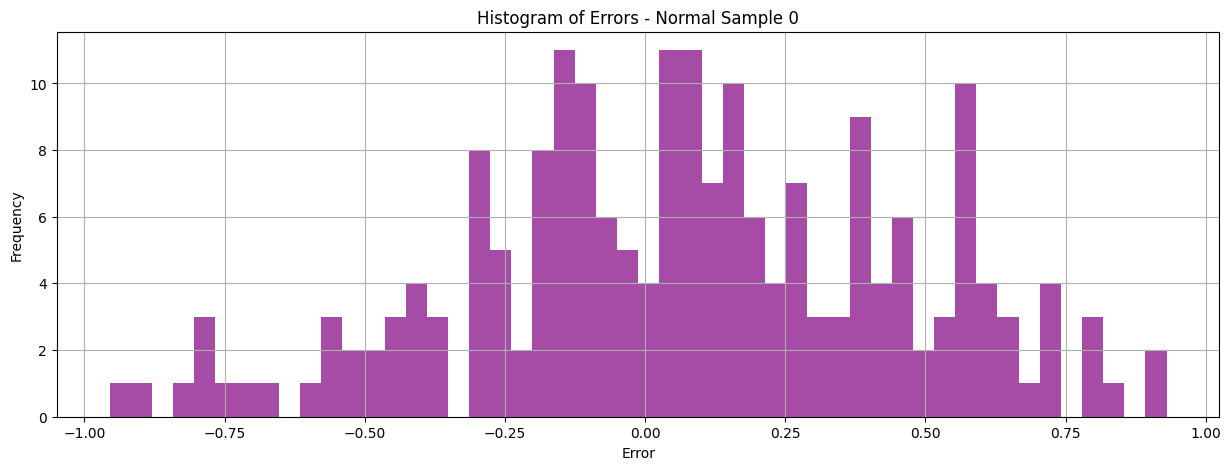

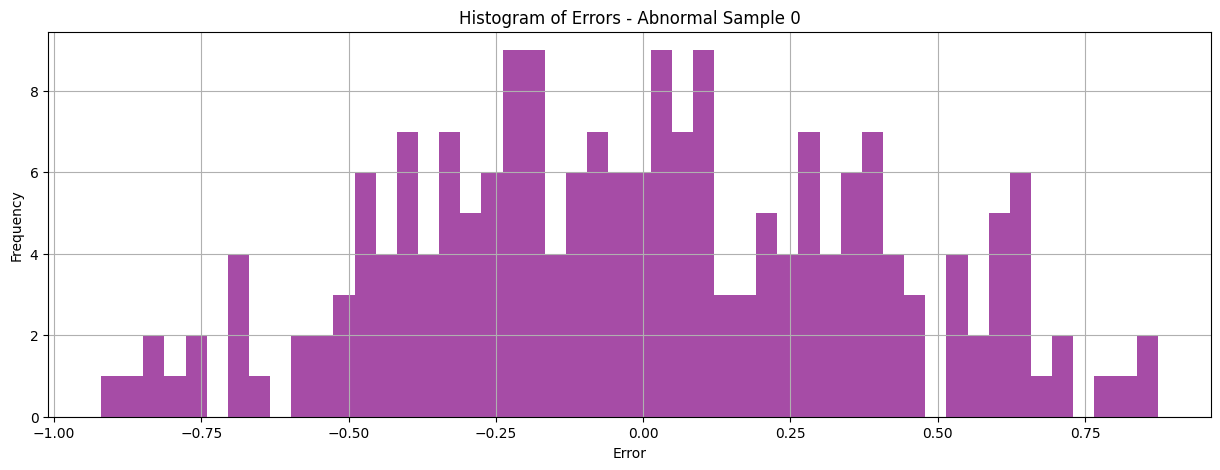

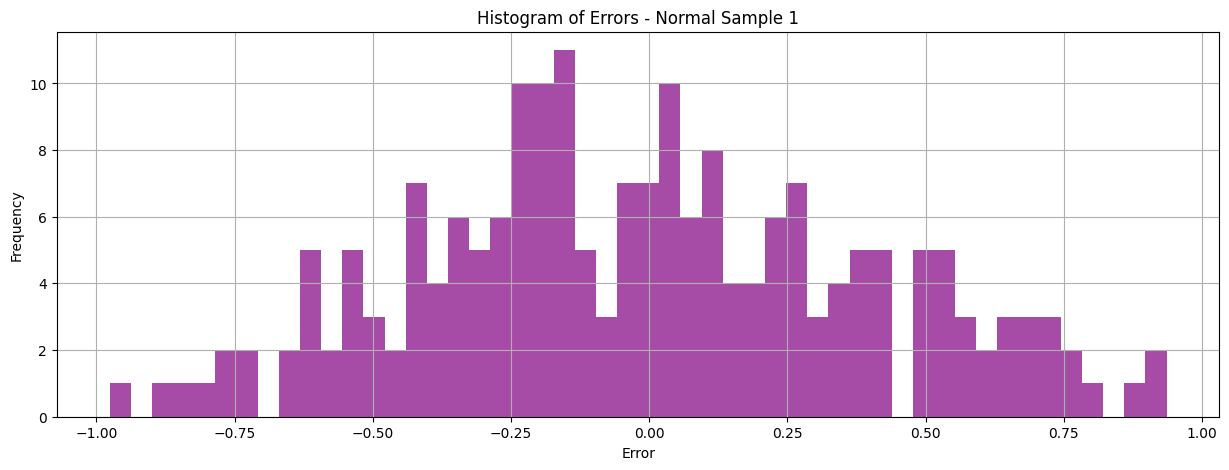

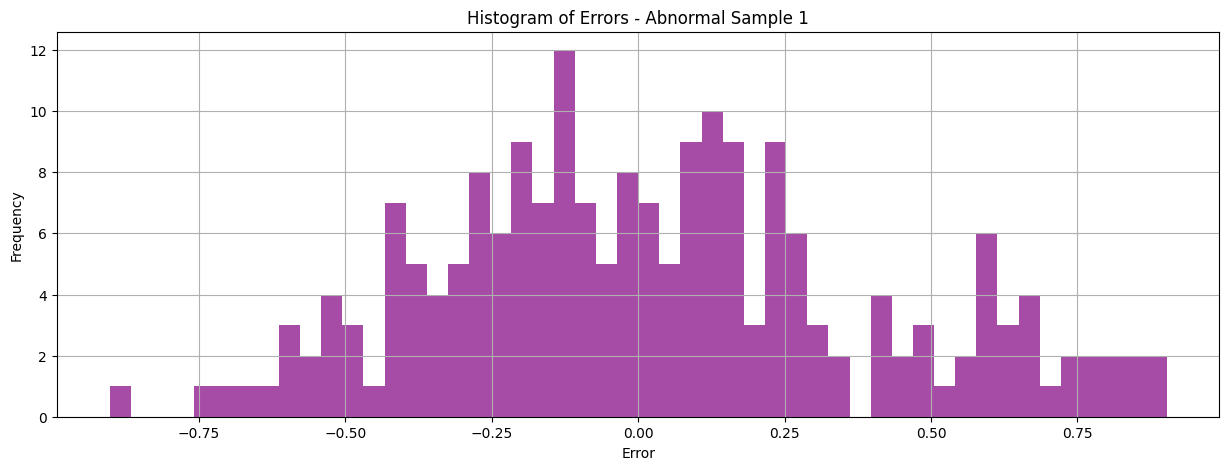

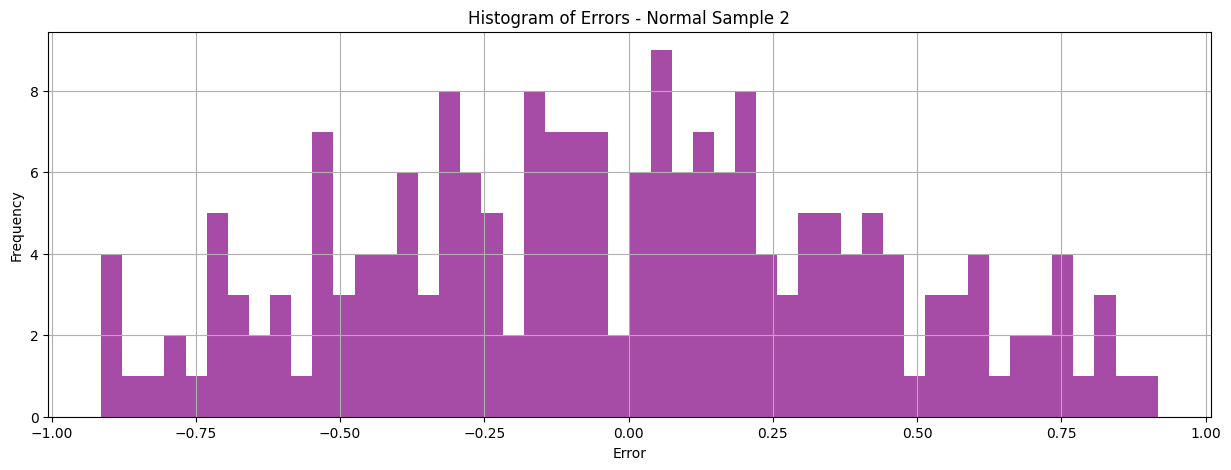

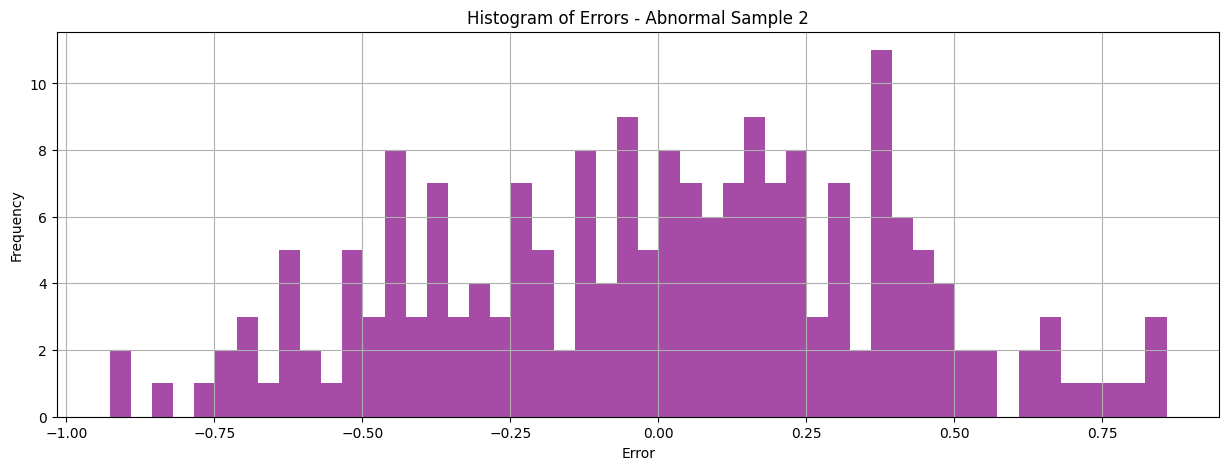

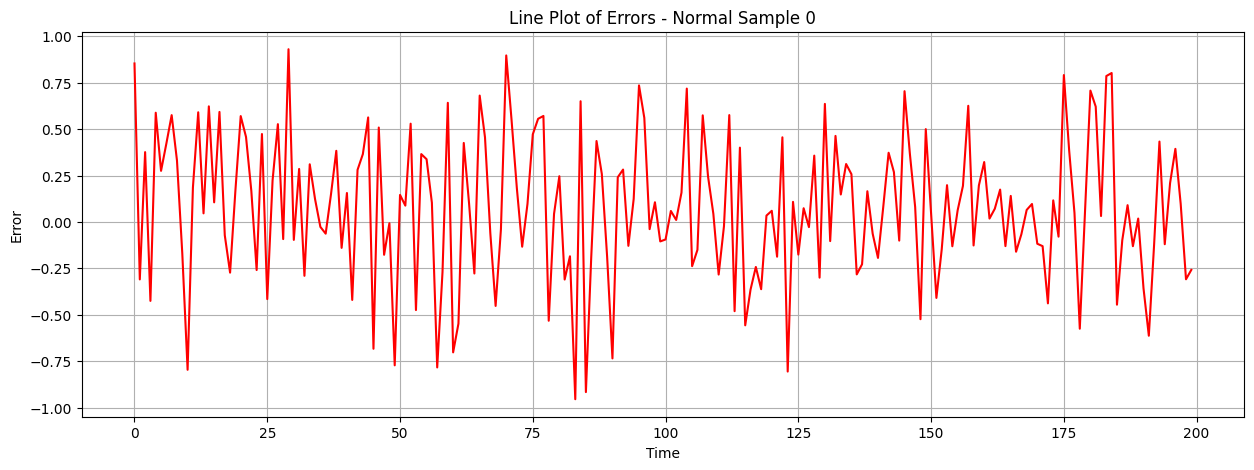

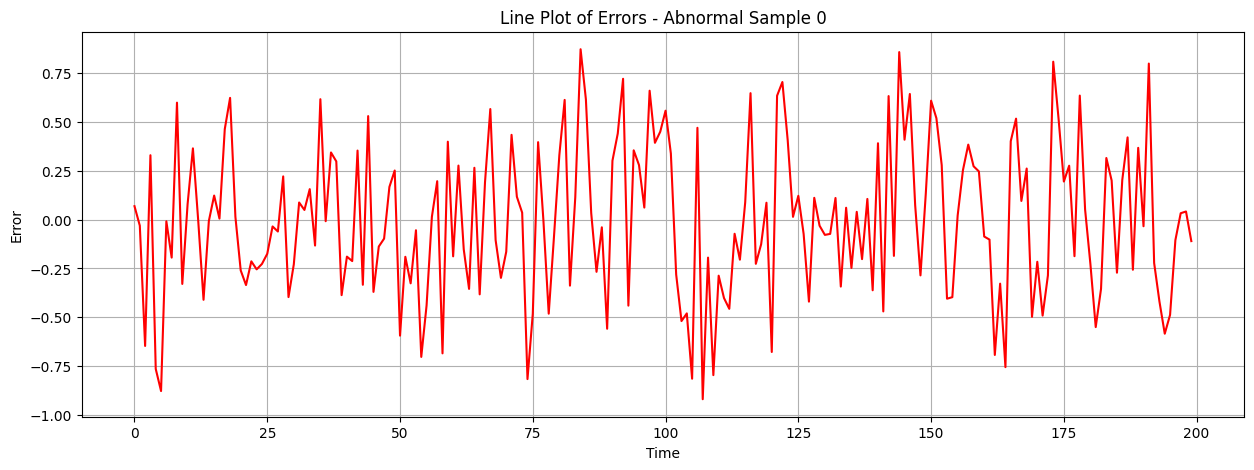

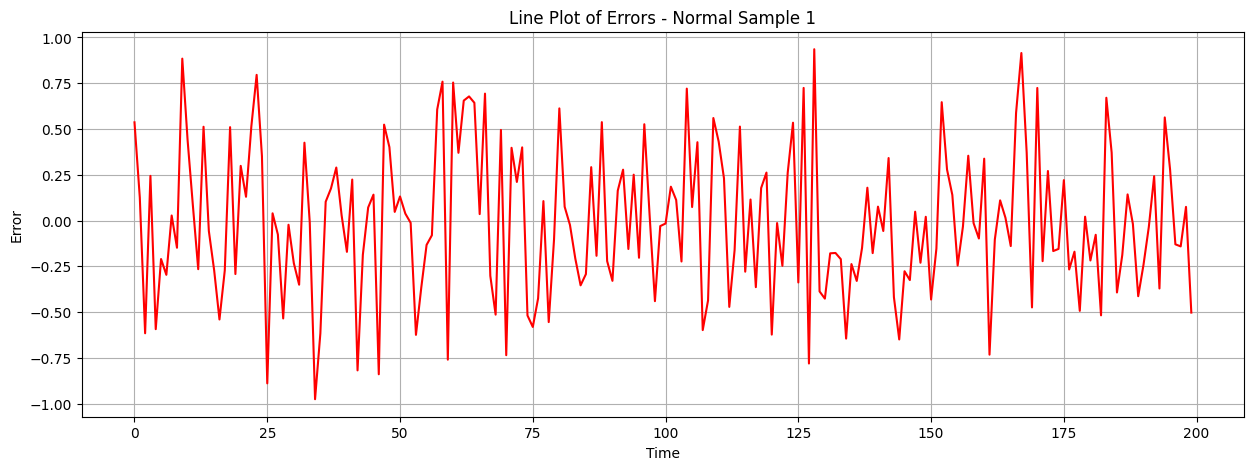

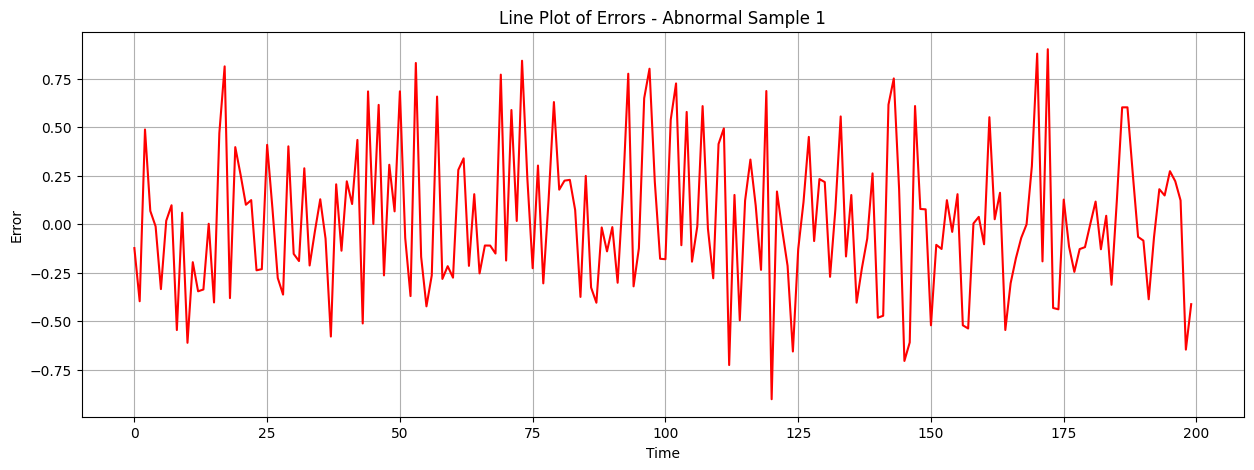

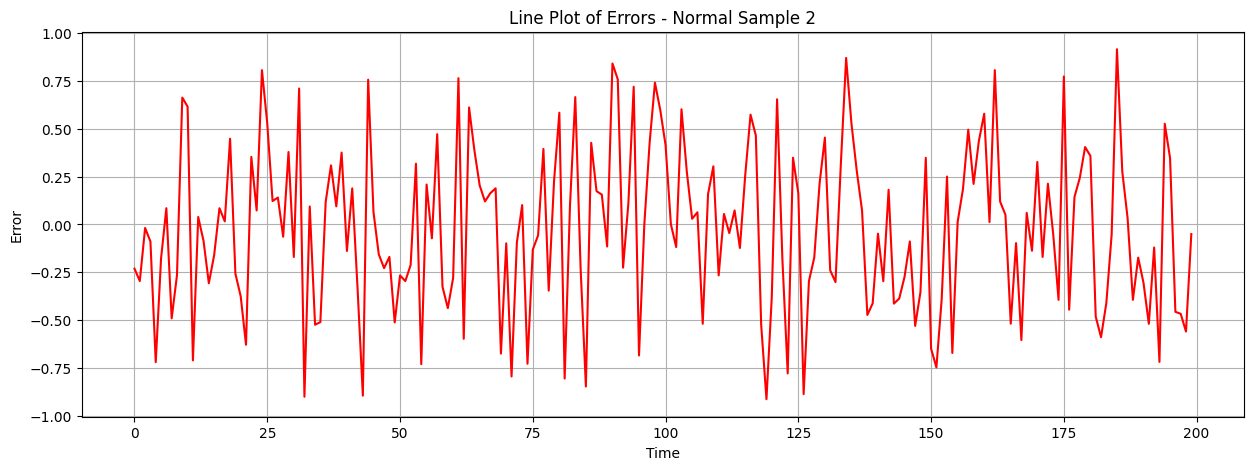

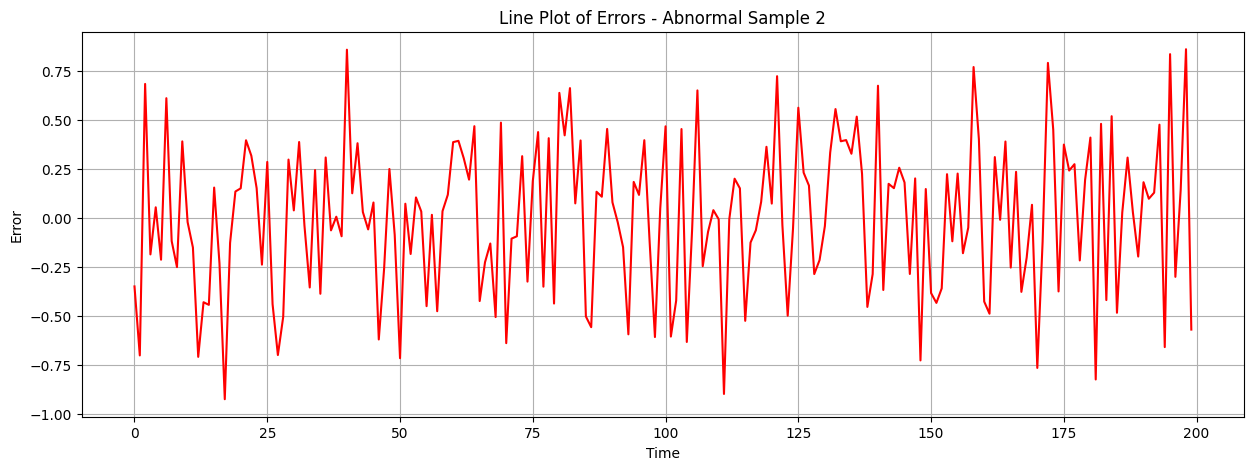

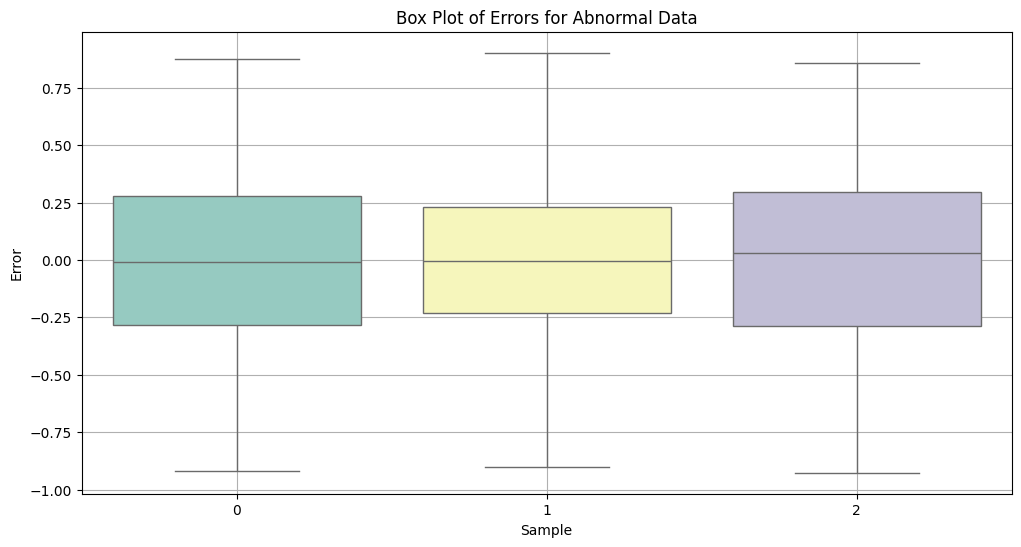


Normal Error Statistics:
           mean       std       max       min
count  3.000000  3.000000  3.000000  3.000000
mean   0.013536  0.406916  0.927631 -0.948260
std    0.052948  0.021222  0.009541  0.031190
min   -0.023136  0.387371  0.917072 -0.975703
25%   -0.016815  0.395630  0.923631 -0.965220
50%   -0.010494  0.403889  0.930190 -0.954736
75%    0.031872  0.416689  0.932911 -0.934538
max    0.074238  0.429489  0.935633 -0.914341

Abnormal Error Statistics:
           mean       std       max       min
count  3.000000  3.000000  3.000000  3.000000
mean   0.006168  0.383099  0.878148 -0.916314
std    0.016314  0.010385  0.022192  0.012750
min   -0.007343  0.371385  0.858613 -0.926735
25%   -0.002894  0.379060  0.866083 -0.923423
50%    0.001556  0.386735  0.873553 -0.920110
75%    0.012924  0.388955  0.887916 -0.911104
max    0.024292  0.391176  0.902278 -0.902098


In [8]:
# Plot original, converted, and difference waveforms for each sample
def plot_waveforms(original, converted, diff, title):
    plt.figure(figsize=(15, 10))

    plt.subplot(3, 1, 1)
    plt.plot(original, label='Original', linestyle=':', color='orange')
    plt.title(f'{title} - Original')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(converted, label='Converted', linestyle='--', color='blue')
    plt.title(f'{title} - Converted')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(diff, label='Difference', linestyle='-', color='green')
    plt.title(f'{title} - Difference')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot waveforms and differences for normal data
for i in range(3):
    plot_waveforms(original_normal_sample[i], reconverted_normal_data.iloc[i].values, normal_error_csv[i], f'Normal Sample {i}')

# Plot waveforms and differences for abnormal data
for i in range(3):
    plot_waveforms(original_abnormal_sample[i], reconverted_abnormal_data.iloc[i].values, abnormal_error_csv[i], f'Abnormal Sample {i}')
# Plot heatmap for normal data error
plt.figure(figsize=(15, 5))
sns.heatmap(normal_error_csv, cmap='coolwarm', center=0)
plt.title('Heatmap of Errors for Normal Data')
plt.xlabel('Time')
plt.ylabel('Sample')
plt.show()

# Plot heatmap for abnormal data error
plt.figure(figsize=(15, 5))
sns.heatmap(abnormal_error_csv, cmap='coolwarm', center=0)
plt.title('Heatmap of Errors for Abnormal Data')
plt.xlabel('Time')
plt.ylabel('Sample')
plt.show()

# Plot histogram of errors for each sample
def plot_error_histogram(errors, title):
    plt.figure(figsize=(15, 5))
    plt.hist(errors.flatten(), bins=50, color='purple', alpha=0.7)
    plt.title(f'Histogram of Errors - {title}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot error histograms
for i in range(3):
    plot_error_histogram(normal_error_csv[i], f'Normal Sample {i}')
    plot_error_histogram(abnormal_error_csv[i], f'Abnormal Sample {i}')

# Plot line plots of errors for each sample
def plot_error_line(errors, title):
    plt.figure(figsize=(15, 5))
    plt.plot(errors, color='red')
    plt.title(f'Line Plot of Errors - {title}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.grid(True)
    plt.show()

# Plot error line plots
for i in range(3):
    plot_error_line(normal_error_csv[i], f'Normal Sample {i}')
    plot_error_line(abnormal_error_csv[i], f'Abnormal Sample {i}')

# Plot box plot of errors for normal and abnormal samples
plt.figure(figsize=(12, 6))
sns.boxplot(data=normal_error_csv.T, palette="Set3")
plt.title('Box Plot of Errors for Normal Data')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=abnormal_error_csv.T, palette="Set3")
plt.title('Box Plot of Errors for Abnormal Data')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Statistical analysis of errors
normal_error_stats = {
    'mean': np.mean(normal_error_csv, axis=1),
    'std': np.std(normal_error_csv, axis=1),
    'max': np.max(normal_error_csv, axis=1),
    'min': np.min(normal_error_csv, axis=1)
}

abnormal_error_stats = {
    'mean': np.mean(abnormal_error_csv, axis=1),
    'std': np.std(abnormal_error_csv, axis=1),
    'max': np.max(abnormal_error_csv, axis=1),
    'min': np.min(abnormal_error_csv, axis=1)
}

normal_error_df = pd.DataFrame(normal_error_stats)
abnormal_error_df = pd.DataFrame(abnormal_error_stats)

# Display statistical analysis results using standard print function
print("\nNormal Error Statistics:")
print(normal_error_df.describe())

print("\nAbnormal Error Statistics:")
print(abnormal_error_df.describe())
# Example data (replace with your actual data)
original_normal_sample = np.random.rand(3, 200)
reconverted_normal_data = pd.DataFrame(np.random.rand(3, 200))
normal_error_csv = original_normal_sample - reconverted_normal_data.values

original_abnormal_sample = np.random.rand(3, 200)
reconverted_abnormal_data = pd.DataFrame(np.random.rand(3, 200))
abnormal_error_csv = original_abnormal_sample - reconverted_abnormal_data.values

# Plot original, converted, and difference waveforms for each sample
def plot_waveforms(original, converted, diff, title):
    plt.figure(figsize=(15, 10))

    plt.subplot(3, 1, 1)
    plt.plot(original, label='Original', linestyle=':', color='orange')
    plt.title(f'{title} - Original')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.plot(converted, label='Converted', linestyle='--', color='blue')
    plt.title(f'{title} - Converted')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.plot(diff, label='Difference', linestyle='-', color='green')
    plt.title(f'{title} - Difference')
    plt.xlabel('Time')
    plt.ylabel('Voltage')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Plot waveforms and differences for normal data
for i in range(3):
    plot_waveforms(original_normal_sample[i], reconverted_normal_data.iloc[i].values, normal_error_csv[i], f'Normal Sample {i}')

# Plot waveforms and differences for abnormal data
for i in range(3):
    plot_waveforms(original_abnormal_sample[i], reconverted_abnormal_data.iloc[i].values, abnormal_error_csv[i], f'Abnormal Sample {i}')

# Plot heatmap for normal data error
plt.figure(figsize=(15, 5))
sns.heatmap(normal_error_csv, cmap='coolwarm', center=0)
plt.title('Heatmap of Errors for Normal Data')
plt.xlabel('Time')
plt.ylabel('Sample')
plt.show()

# Plot heatmap for abnormal data error
plt.figure(figsize=(15, 5))
sns.heatmap(abnormal_error_csv, cmap='coolwarm', center=0)
plt.title('Heatmap of Errors for Abnormal Data')
plt.xlabel('Time')
plt.ylabel('Sample')
plt.show()

# Plot histogram of errors for each sample
def plot_error_histogram(errors, title):
    plt.figure(figsize=(15, 5))
    plt.hist(errors.flatten(), bins=50, color='purple', alpha=0.7)
    plt.title(f'Histogram of Errors - {title}')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot error histograms
for i in range(3):
    plot_error_histogram(normal_error_csv[i], f'Normal Sample {i}')
    plot_error_histogram(abnormal_error_csv[i], f'Abnormal Sample {i}')

# Plot line plots of errors for each sample
def plot_error_line(errors, title):
    plt.figure(figsize=(15, 5))
    plt.plot(errors, color='red')
    plt.title(f'Line Plot of Errors - {title}')
    plt.xlabel('Time')
    plt.ylabel('Error')
    plt.grid(True)
    plt.show()

# Plot error line plots
for i in range(3):
    plot_error_line(normal_error_csv[i], f'Normal Sample {i}')
    plot_error_line(abnormal_error_csv[i], f'Abnormal Sample {i}')

# Plot box plot of errors for normal and abnormal samples
plt.figure(figsize=(12, 6))
sns.boxplot(data=normal_error_csv.T, palette="Set3")
plt.title('Box Plot of Errors for Normal Data')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=abnormal_error_csv.T, palette="Set3")
plt.title('Box Plot of Errors for Abnormal Data')
plt.xlabel('Sample')
plt.ylabel('Error')
plt.grid(True)
plt.show()

# Statistical analysis of errors
normal_error_stats = {
    'mean': np.mean(normal_error_csv, axis=1),
    'std': np.std(normal_error_csv, axis=1),
    'max': np.max(normal_error_csv, axis=1),
    'min': np.min(normal_error_csv, axis=1)
}

abnormal_error_stats = {
    'mean': np.mean(abnormal_error_csv, axis=1),
    'std': np.std(abnormal_error_csv, axis=1),
    'max': np.max(abnormal_error_csv, axis=1),
    'min': np.min(abnormal_error_csv, axis=1)
}

normal_error_df = pd.DataFrame(normal_error_stats)
abnormal_error_df = pd.DataFrame(abnormal_error_stats)

# Display statistical analysis results using standard print function
print("\nNormal Error Statistics:")
print(normal_error_df.describe())

print("\nAbnormal Error Statistics:")
print(abnormal_error_df.describe())
